In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve,f1_score
from scipy.stats import iqr

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
df.shape

(9240, 37)

In [4]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
print("Data Imbalance :", round(df.Converted.sum()/len(df)*100,2))

Data Imbalance : 38.54


In [7]:
df.duplicated().sum()

0

In [8]:
# replacing "Select" with null.
df.replace({"Select":np.NaN},inplace=True)

In [9]:
df.drop("Prospect ID",axis=1,inplace=True)    
# as lead Number and Prospect ID serves the same purpose, we will keep Lead Number only

In [10]:
df["Lead Number"] = df["Lead Number"].astype("int")

In [11]:
# checking null value percentage
df.isnull().sum()/len(df) * 100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [12]:
# variables with more than 40% null values
df.columns[(df.isnull().sum()/len(df) * 100) > 40]

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [13]:
# let's drop these columns
drop_cols = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
           'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
           'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

In [14]:
df.drop(drop_cols,axis=1,inplace=True)

In [15]:
# check the null values again
df.isnull().sum()/len(df)*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [16]:
# let's take a look at 'tags', 'last activity', 'last notable activity' columns because they contain 
# significant number of categories.

# tags
TAGS = pd.DataFrame(df["Tags"].value_counts().sort_index())
TAGS["Conv_nums"] = df.groupby("Tags").Converted.sum().sort_index().values
TAGS = TAGS.reset_index(names="Tag Name")
TAGS

Tag Name  Tags  Conv_nums
0                                   Already a student   465          3
1                                                Busy   186        105
2                                  Closed by Horizzon   358        356
3                       Diploma holder (Not Eligible)    63          1
4                              Graduation in progress   111          7
5               In confusion whether part time or DLP     5          1
6                        Interested  in full time MBA   117          3
7                            Interested in Next batch     5          5
8                         Interested in other courses   513         13
9                                     Lateral student     3          3
10                                       Lost to EINS   175        171
11                                     Lost to Others     7          0
12                        Not doing further education   145          1
13                   Recognition issue (DEC approval)     1          0
14                                            Ringing  1203         34
15                Shall take in the next coming month     2          1
16                                     Still Thinking     6          1
17                          University not recognized     2          0
18  Want to take admission but has financial problems     6          2
19                Will revert after reading the email  2072       2007
20                                 in touch with EINS    12          3
21                                     invalid number    83          1
22                                number not provided    27          0
23                                         opp hangup    33          3
24                                       switched off   240          4
25                                 wrong number given    47          0

In [17]:
# let's categorise similar kind of tags in one category.

df["Tags"] = df["Tags"].apply(lambda x : "Not connected" if x in 
                                          ["Busy","Ringing","invalid number",
                                            "number not provided",'opp hangup',
                                            "switched off","wrong number given"] else x)

df["Tags"] = df["Tags"].apply(lambda x : "Competition Involved" if x in 
                                          ['Closed by Horizzon','Lost to EINS', 'Lost to Others',
                                           'in touch with EINS'] else x)

df["Tags"] = df["Tags"].apply(lambda x : "Future prospect" if x in 
                                          ['Diploma holder (Not Eligible)','Graduation in progress',
                                           'Not doing further education', 'Interested in other courses'] else x)

df["Tags"] = df["Tags"].apply(lambda x : "Warm prospect" if x in 
                                          ['Interested in Next batch','Lateral student',
                                           'Shall take in the next coming month', 
                                         'Still Thinking',"Want to take admission but has financial problems",
                                          "In confusion whether part time or DLP"] else x)

df["Tags"] = df["Tags"].apply(lambda x : "Cold prospect" if x in 
                                          ["Interested  in full time MBA","University not recognized",
                                           "Recognition issue (DEC approval)"] else x)

In [18]:
df.groupby(by="Tags").Converted.sum().sort_values(ascending=0)

Tags
Will revert after reading the email    2007
Competition Involved                    530
Not connected                           147
Future prospect                          22
Warm prospect                            13
Already a student                         3
Cold prospect                             3
Name: Converted, dtype: int64

In [19]:
# 'last activity'

LA = pd.DataFrame(df["Last Activity"].value_counts().sort_index())
LA["Conv_nums"] = df.groupby("Last Activity").Converted.sum().sort_index().values
LA.reset_index(names="Activity name",inplace=True)
LA

Activity name  Last Activity  Conv_nums
0             Approached upfront              9          9
1              Converted to Lead            428         54
2                  Email Bounced            326         26
3             Email Link Clicked            267         73
4              Email Marked Spam              2          2
5                   Email Opened           3437       1253
6                 Email Received              2          2
7      Form Submitted on Website            116         28
8       Had a Phone Conversation             30         22
9        Olark Chat Conversation            973         84
10       Page Visited on Website            640        151
11        Resubscribed to emails              1          1
12                      SMS Sent           2745       1727
13                   Unreachable             93         31
14                  Unsubscribed             61         16
15  View in browser link Clicked              6          1
16    Visited Booth in Tradeshow              1          0

In [20]:
# last notable activity

LNA = pd.DataFrame(df["Last Notable Activity"].value_counts().sort_index())
LNA["Conv_nums"] = df.groupby("Last Notable Activity",dropna=False).Converted.sum().sort_index().values
LNA.reset_index(names="LNA Name",inplace=True)
LNA

LNA Name  Last Notable Activity  Conv_nums
0             Approached upfront                      1          1
1                  Email Bounced                     60          9
2             Email Link Clicked                    173         45
3              Email Marked Spam                      2          2
4                   Email Opened                   2827       1044
5                 Email Received                      1          1
6      Form Submitted on Website                      1          0
7       Had a Phone Conversation                     14         13
8                       Modified                   3407        783
9        Olark Chat Conversation                    183         25
10       Page Visited on Website                    318         93
11        Resubscribed to emails                      1          1
12                      SMS Sent                   2172       1508
13                   Unreachable                     32         22
14                  Unsubscribed                     47         14
15  View in browser link Clicked                      1          0

In [21]:
# as we can see that a lot of categories are similar in last activity and last notable activity, lets check for correlation 
# between these two variables 

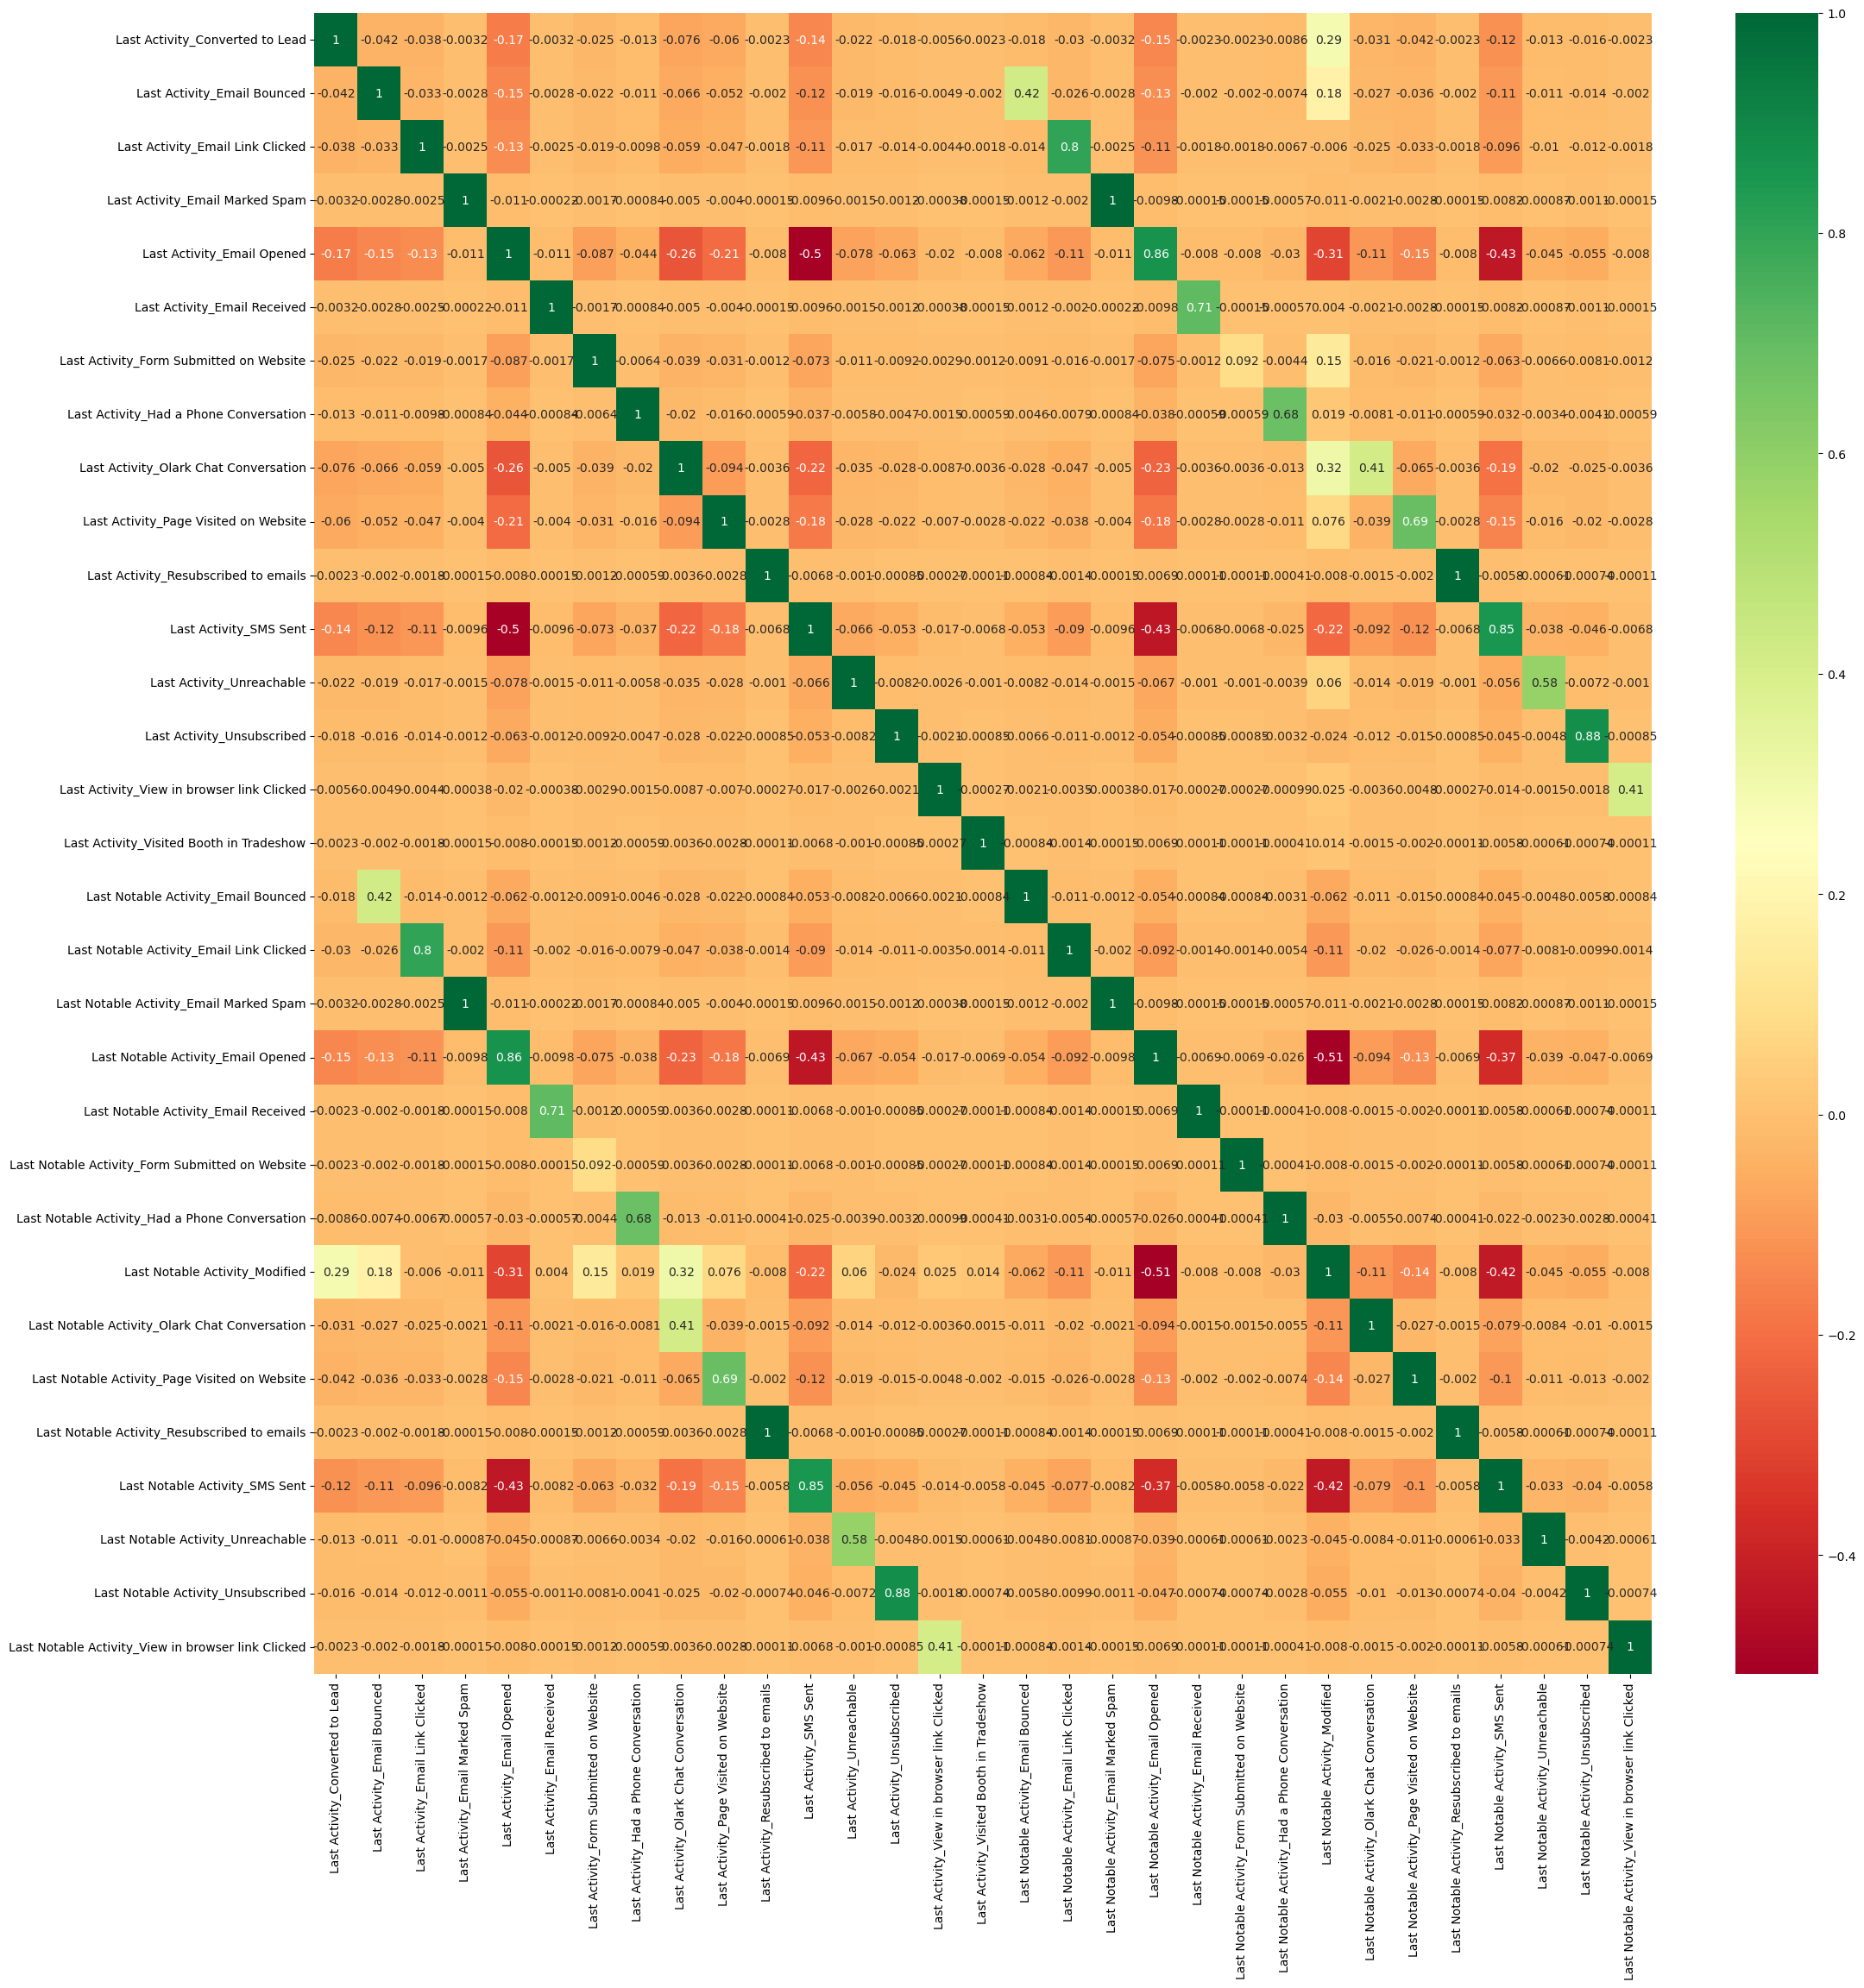

In [22]:
correlation_matrix = pd.get_dummies(df[["Last Activity","Last Notable Activity"]],drop_first=True).corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix,cmap="RdYlGn",annot=True)
plt.show()

There seems to be high correlation between a lot of categories from both the variable, so lets drop "last activity" variable and keep "last notable activity" for further analysis

In [23]:
df.drop("Last Activity",axis=1,inplace=True)

In [24]:
# lets club together some of the similar kind of categories from last notable activity column



df["Last Notable Activity"] = df["Last Notable Activity"].apply(lambda x:"Email Activity" if str(x) in 
                                                                ["Email Bounced","Email Link Clicked","Email Marked Spam","Email Opened",
                                                                "Email Received","Resubscribed to emails",
                                                                 "Unsubscribed"] else x)

df["Last Notable Activity"] = df["Last Notable Activity"].apply(lambda x:"Connected" if str(x) in 
                                                                ["Had a Phone Conversation","Approached upfront",
                                                                "Olark Chat Conversation"] else x)

df["Last Notable Activity"] = df["Last Notable Activity"].apply(lambda x:"Website interaction" if str(x) in 
                                                                ["Form Submitted on Website", "Page Visited on Website",
                                                                "View in browser link Clicked"] else x)

df.groupby(by="Last Notable Activity").Converted.sum()

Last Notable Activity
Connected                39
Email Activity         1116
Modified                783
SMS Sent               1508
Unreachable              22
Website interaction      93
Name: Converted, dtype: int64

In [25]:
# we have reduced the number of categories in the tags, last activity, last notable activity. but we still have high number 
# of missing values in tags variable, we will deal with that in next step.

(df.isnull().sum()/len(df)*100).sort_values(ascending=0)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Number                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.0000

In [26]:
cols_with_high_null = ['Country','Specialization','What is your current occupation',
'What matters most to you in choosing a course','City','Tags']

In [27]:
for i in cols_with_high_null:
    print(round(df[i].value_counts(normalize=True,dropna=False)*100,2),"\n\n")

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

as we can see that "Country" & "What matters most to you in choosing a course" columns are heavily skewed, we can drop these columns and for the rest of the columns we can impute the null in percentage proportion of categories, because if we impute the rest of the columns with simply mode then it will again result in high skewness.

In [28]:
df.drop(["Country","What matters most to you in choosing a course"],axis=1,inplace=True)

before imputing null values, let's merge categories with lower proportion with suitable category.

In [29]:
# as we have already merged categories in tags variable, lets start with tags variable and deal with null values
distribution = df.Tags.value_counts(normalize=True,dropna=False)
distribution

NaN                                    0.362879
Will revert after reading the email    0.224242
Not connected                          0.196861
Future prospect                        0.090043
Competition Involved                   0.059740
Already a student                      0.050325
Cold prospect                          0.012987
Warm prospect                          0.002922
Name: Tags, dtype: float64

In [30]:
df.Tags.fillna(pd.Series(np.random.choice(distribution.index,p=distribution.values,size=len(df))),inplace=True)

In [31]:
# Specialization Variable

In [32]:
df.Specialization.value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

Let's distribute these specializations in Business, Management & Others

In [33]:
df.Specialization = df.Specialization.map(lambda x: "Management" if "Management" in str(x) else x)

In [34]:
df.Specialization = df.Specialization.map(lambda x:"Business" if "business" in str(x).lower() else x)

In [35]:
df.Specialization = df.Specialization.map(lambda x:"Others" if str(x) not in ["Management","Business"] else x,
                                          na_action="ignore")

In [36]:
distribution = df.Specialization.value_counts(normalize=True,dropna=False)
distribution

Management    0.460281
NaN           0.365801
Others        0.096970
Business      0.076948
Name: Specialization, dtype: float64

In [37]:
# filling null values with each category proportionally.
df.Specialization.fillna("Not Decided",inplace=True)

In [38]:
df.Specialization.value_counts(normalize=True)

Management     0.460281
Not Decided    0.365801
Others         0.096970
Business       0.076948
Name: Specialization, dtype: float64

In [39]:
# lets check the occupation variable
df['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [40]:
# firstly lets change the column name to "occupation"
df.rename({'What is your current occupation':"Occupation"},axis=1,inplace=True)

In [41]:
df.Occupation = df.Occupation.map(lambda x:"Employed" if x in ["Working Professional","Businessman"] else x)
# Employed --> either self employed or working professional.

In [42]:
df.Occupation = df.Occupation.map(lambda x:"Student & others" if x not in ["Unemployed","Employed"] else x, na_action="ignore")
# Student & others --> all remaining categories except "Working Professional","Businessman","Unemployed"

In [43]:
distribution_Occupation = df.Occupation.value_counts(normalize=True,dropna=False)
distribution_Occupation

Unemployed          0.606061
NaN                 0.291126
Employed            0.077273
Student & others    0.025541
Name: Occupation, dtype: float64

In [44]:
df.Occupation.fillna("Unspecified",inplace=True)

In [45]:
# Let's perform the same operation on City variable

In [46]:
df.City.value_counts(normalize=True,dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [47]:
df.City = df.City.map(lambda x:"Non-Mumbai" if x in ["Thane & Outskirts","Other Cities of Maharashtra"] else x)

In [48]:
df.City = df.City.map(lambda x:"Non-Maharashtra" if x in ["Other Cities","Other Metro Cities","Tier II Cities"] else x)

In [49]:
distribution_city = df.City.value_counts(normalize=True,dropna=False)
distribution_city

NaN                0.397078
Mumbai             0.348701
Non-Mumbai         0.130844
Non-Maharashtra    0.123377
Name: City, dtype: float64

In [50]:
df.City.fillna("Not Mentioned",inplace=True)

In [51]:
df.City.value_counts(normalize=True)

Not Mentioned      0.397078
Mumbai             0.348701
Non-Mumbai         0.130844
Non-Maharashtra    0.123377
Name: City, dtype: float64

In [52]:
df.select_dtypes(include="object").nunique()

Lead Origin                                  5
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Specialization                               4
Occupation                                   4
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Tags                                         7
Update me on Supply Chain Content            1
Get updates on DM Content                    1
City                                         4
I agree to pay the amount through cheque     1
A free copy of Mastering The Interview       2
Last Notable Activity                        6
dtype: int64

- Lead Source & Lead Origin columns have 21 & 5 categories respectively, lets take a look at them and will try to reduce the number of categories.
- Also, we will drop the variables with only one category as we wont be getting any valuable insights from tese variables.

In [53]:
df["Lead Source"].value_counts(normalize=True,dropna=False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [54]:
df["Lead Source"] = df["Lead Source"].map(lambda x:"Others" if x not in ['Google', 'Direct Traffic', 'Olark Chat', 
                                                     'Organic Search','Reference'] else x,na_action="ignore")

In [55]:
#  let's fill the null values with mode as the null value percentage is less than 1%
mode = df["Lead Source"].mode()[0]
df["Lead Source"].fillna(mode,inplace=True)

In [56]:
df["Lead Source"].value_counts(normalize=True,dropna=False)

Google            0.314286
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Others            0.037879
Name: Lead Source, dtype: float64

In [57]:
df["Lead Origin"].value_counts(normalize=True,dropna=False)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [58]:
# lets categorize Lead Add Form,Lead Import,Quick Add Form into "Lead Import & form"

In [59]:
df["Lead Origin"] = df["Lead Origin"].map(lambda x:"Lead Import & form" if x not in ["Landing Page Submission","API"] else x,
                      na_action="ignore")

In [174]:
# let's drop single category columns because of low variance

In [61]:
df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content",
         "Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [62]:
# let's check the skewness in each variable, if highly skewed, will drop them.

for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts(normalize=True)*100,"\n")

Landing Page Submission    52.878788
API                        38.744589
Lead Import & form          8.376623
Name: Lead Origin, dtype: float64 

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Others             3.787879
Name: Lead Source, dtype: float64 

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64 

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64 

Management     46.028139
Not Decided    36.580087
Others          9.696970
Business        7.694805
Name: Specialization, dtype: float64 

Unemployed          60.606061
Unspecified         29.112554
Employed             7.727273
Student & others     2.554113
Name: Occupation, dtype: float64 

No     99.848485
Yes     0.151515
Name: Search, dtype: float64 

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64 

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float6

In [63]:
# dropping below columns because of high skewness
drop_cols = ["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper",
"Digital Advertisement","Through Recommendations"]

df.drop(drop_cols,axis=1,inplace=True)

#### Numerical Variable Analysis

In [64]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [65]:
numerical_cols = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

In [66]:
# lets fill the missing values with median
df[numerical_cols] = df[numerical_cols].fillna(df.median())

In [67]:
df[numerical_cols].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.438636                   487.698268              2.357440
std       4.819024                   548.021466              2.145781
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
max     251.000000                  2272.000000             55.000000

Note: Looking at the max value, we can roughly say that there might be presence of outliers, we will check that by plotting box plots.

In [68]:
# firstly we will check for correlation and then check for outliers.

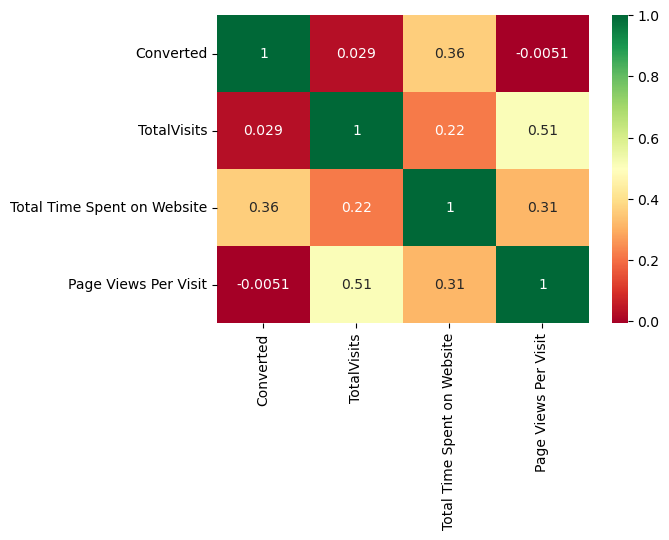

In [69]:
corr = df[['Converted','TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr,cmap="RdYlGn",annot=True)
plt.show()

Note:
- 'Total Time Spent on Website' is positively correlated with the 'converted' variable.
- no significant multi-correlation present between numerical columns

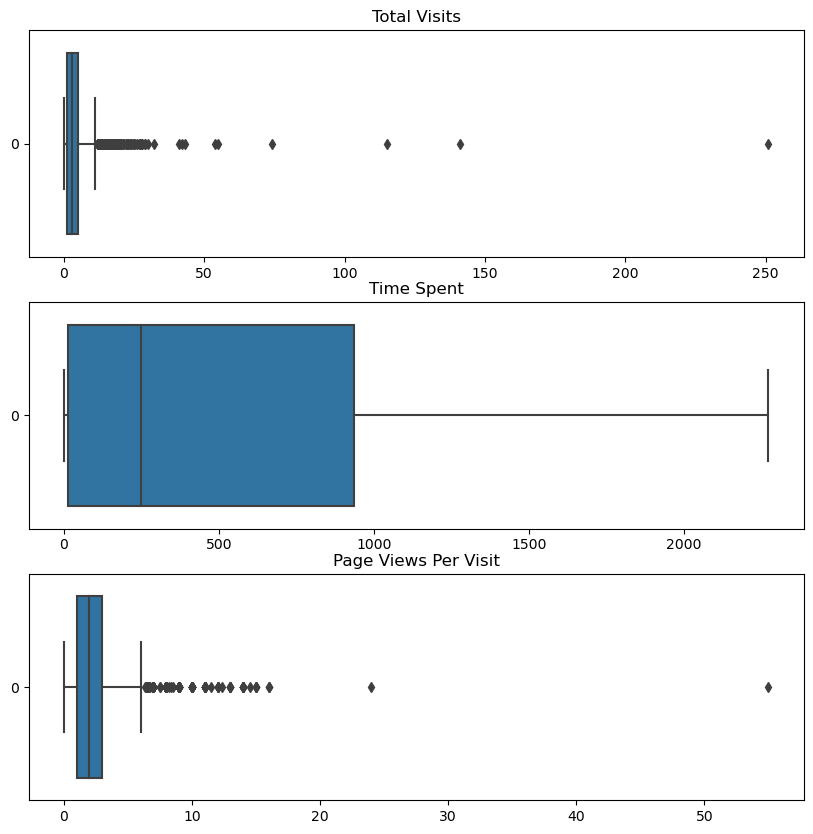

In [70]:
# lets check for outliers

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.boxplot(df.TotalVisits,orient="h")
plt.title("Total Visits")

plt.subplot(3,1,2)
sns.boxplot(df["Total Time Spent on Website"],orient="h")
plt.title("Time Spent")

plt.subplot(3,1,3)
sns.boxplot(df["Page Views Per Visit"],orient="h")
plt.title("Page Views Per Visit")

plt.show()

Note: Total views, Page views per visit contains outliers. we will deal with them before building model.

### Categorical Variables

In [71]:
df.select_dtypes(include="object").columns

Index(['Lead Origin', 'Lead Source', 'Specialization', 'Occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [72]:
categorical_cols = ['Lead Origin', 'Lead Source', 'Specialization', 'Occupation', 'Tags','City', 
                    'A free copy of Mastering The Interview','Last Notable Activity']

In [73]:
# firstly lets check the category wise distribution of each vcariable 

In [74]:
def Univariate_categorical(df,x):
    df[x].value_counts().plot(kind="bar")
    plt.title(x)
    plt.xticks(rotation=0)
    plt.show()

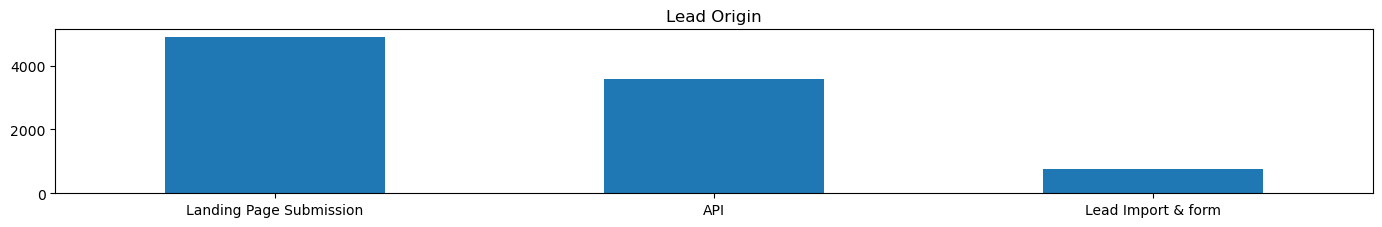

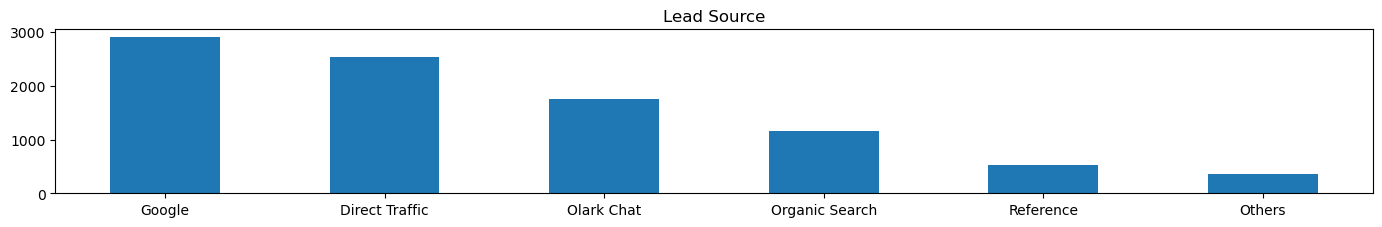

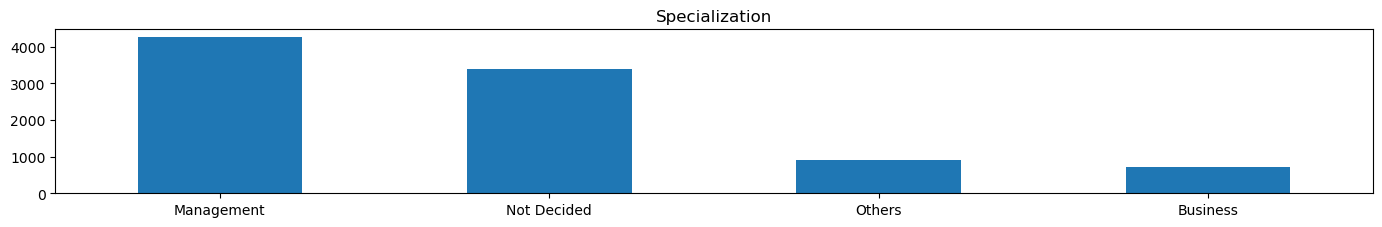

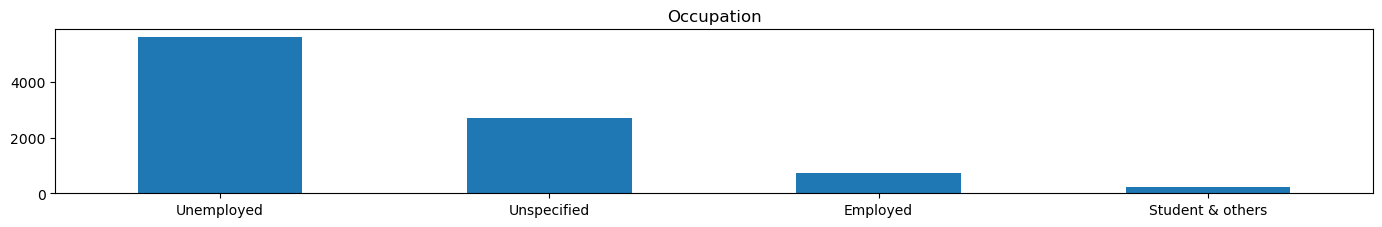

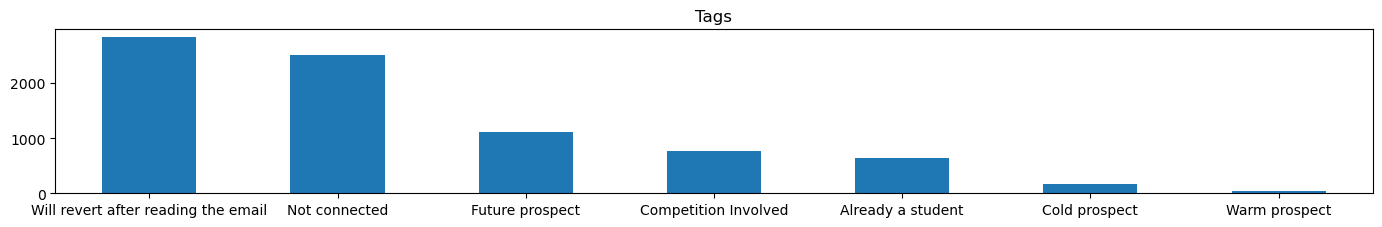

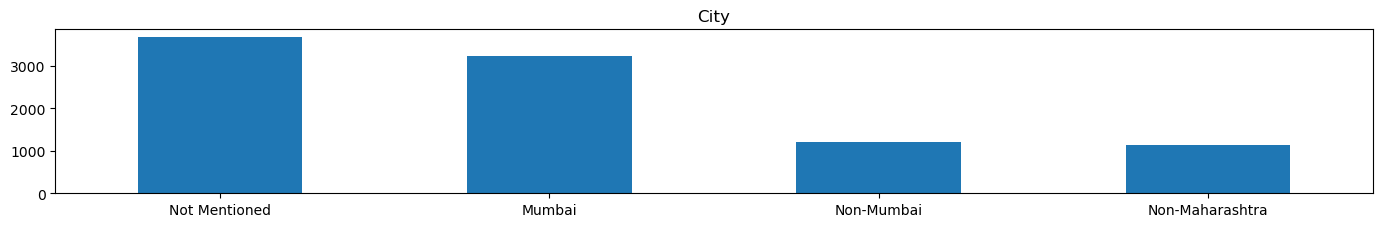

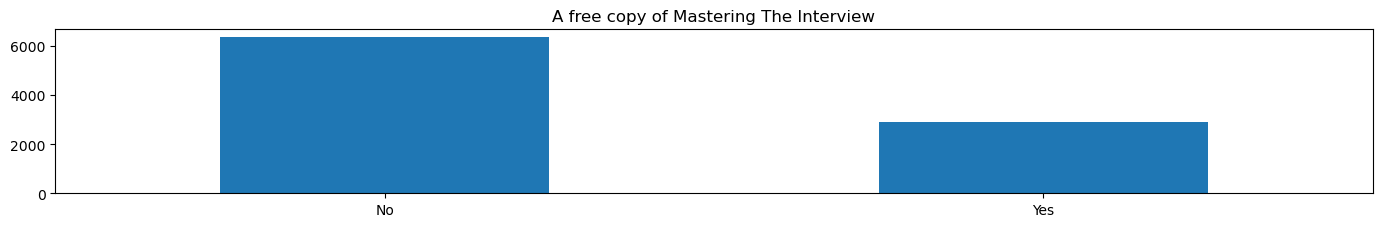

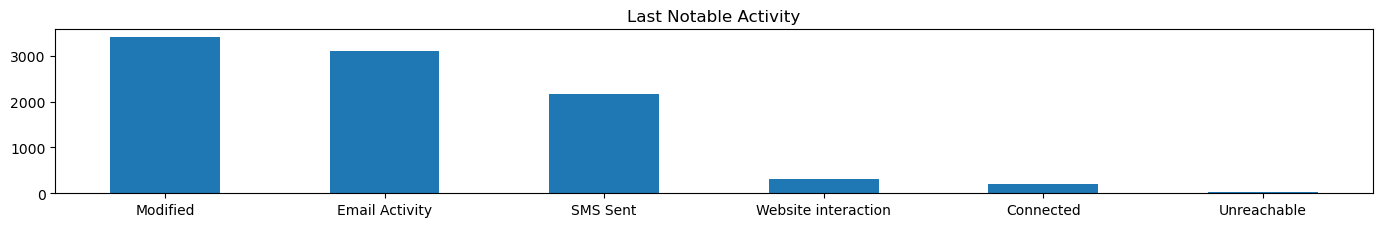

In [75]:
for i,j in enumerate(categorical_cols,1):
    plt.figure(figsize=(17,20))
    plt.subplot(8,1,i)
    Univariate_categorical(df,j)

In [76]:
# lets check categorical variables wrt the target variable(Converted)

In [77]:
def Bivariate_categorical(df,a):
    sns.countplot(x=df[a],hue=df.Converted)
    plt.show()

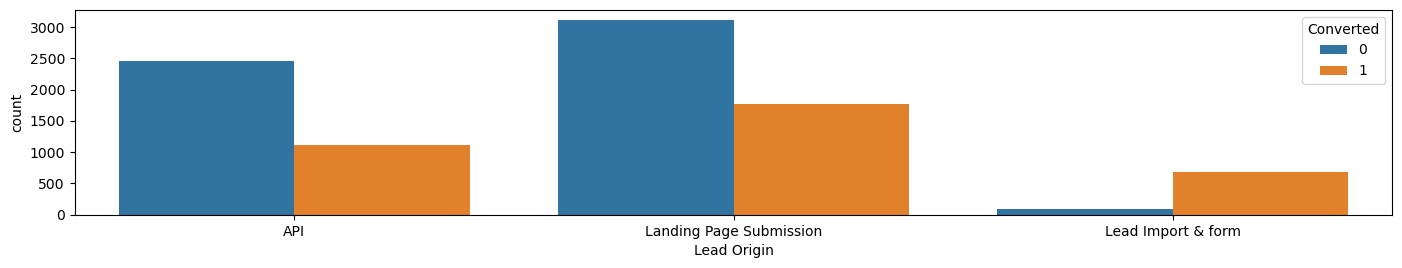

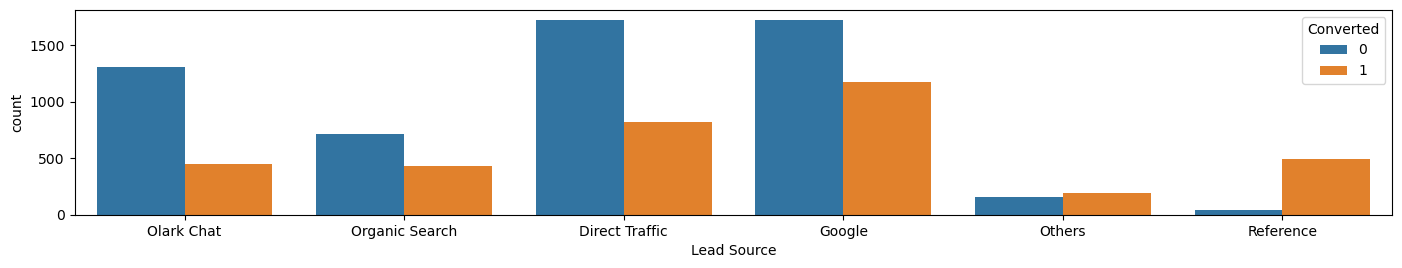

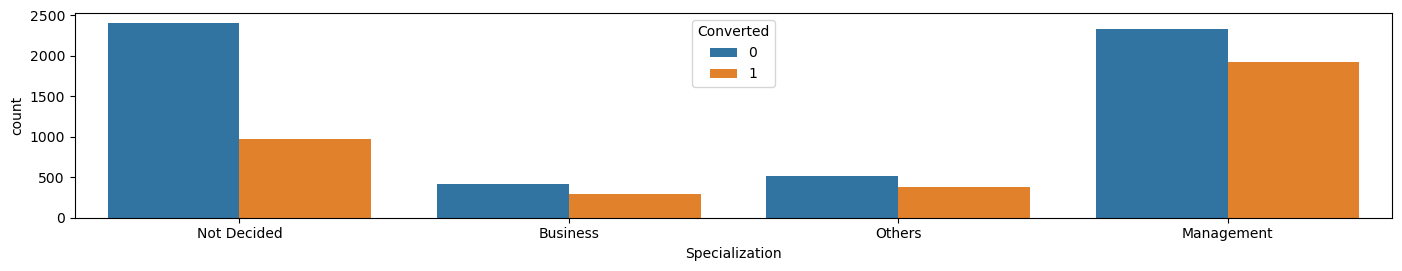

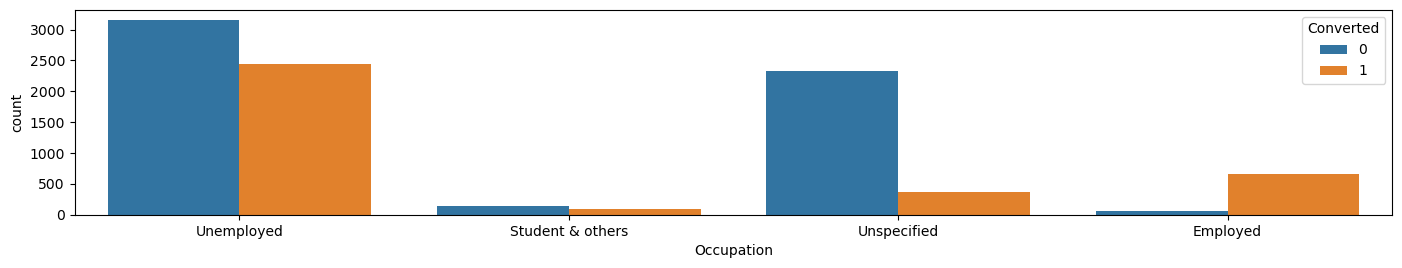

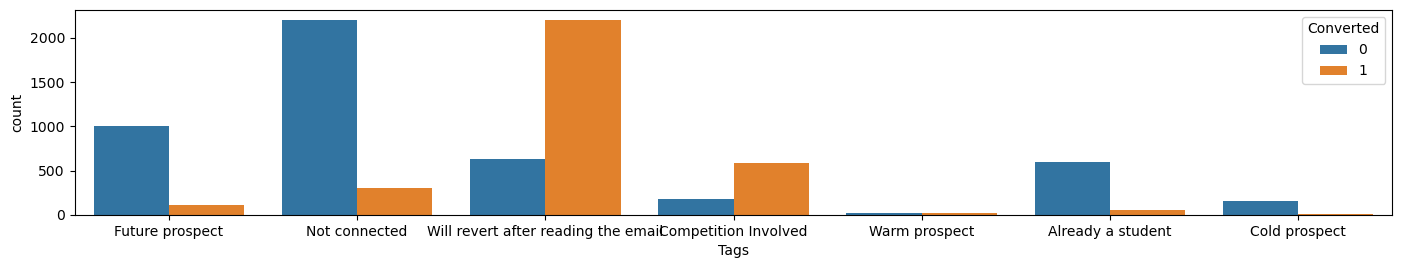

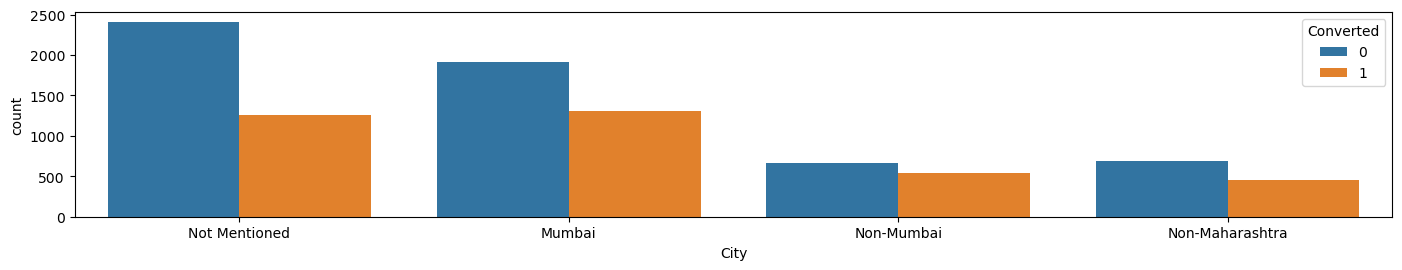

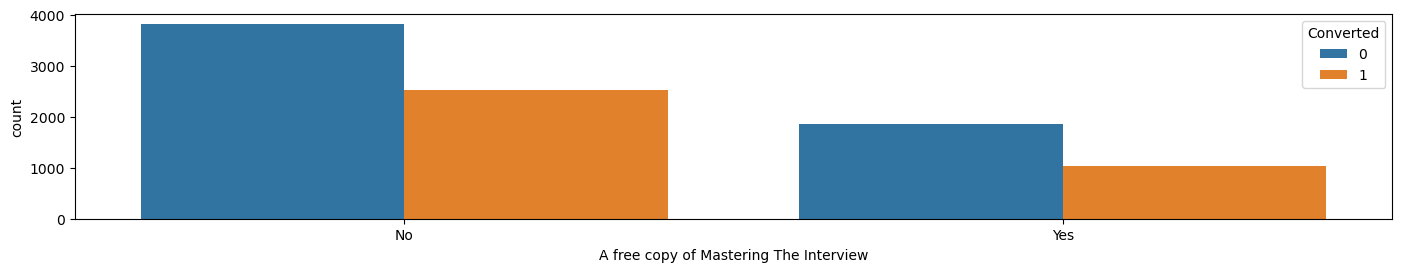

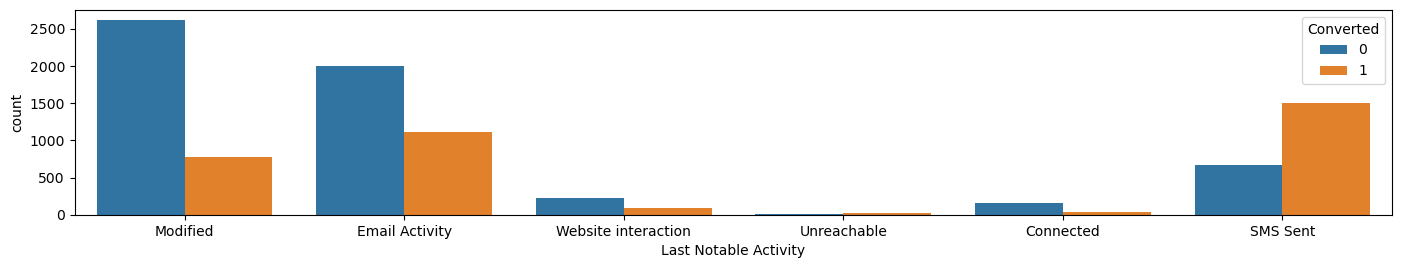

In [78]:
for i,j in enumerate(categorical_cols,1):
    plt.figure(figsize=(17,25))
    plt.subplot(8,1,i)
    Bivariate_categorical(df,j)

Note:
- "Lead Origin"- although "Landing page submission" and "API" have higher contribution, "Lead import & form" have higher percentage of conversion.
- "Lead Source"- "direct traffic" & "Google" have highest contribution but "reference" ensures the conversion in ost of the cases. 
- "Do not email"- we can say that those who agree to not receive email have slightly lower conversion rate.
- "Specialization" - Most of the clients opt for management specialization.
- "Occupation" - a lot of clients are unemployed but there is quite high chance of conversion if client is employed(working professional or businessman).
- "City" - although most of the people are from mumbai, but the conversion rate is quite similar for non-mumbai or non-mahjarashtra people.
- 'A free copy of Mastering The Interview' - although most of the people do not want a free copy, the variable does not seem to have any significant impact on the conversion rate.

### data preprocessing

- let's preprocess the data for model building.
- we will first convert categorical columns into numerical using "one hot encoding"

In [79]:
df.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

  Specialization        Occupation                                 Tags  \
0    Not Decided        Unemployed                      Future prospect   
1    Not Decided        Unemployed                        Not connected   
2       Business  Student & others  Will revert after reading the email   
3         Others        Unemployed                        Not connected   
4    Not Decided        Unemployed  Will revert after reading the email   

            City A free copy of Mastering The Interview Last Notable Activity  
0  Not Mentioned                                     No              Modified  
1  Not Mentioned                                     No        Email Activity  
2         Mumbai                                    Yes        Email Activity  
3         Mumbai                                     No              Modified  
4         Mumbai                                     No              Modified

In [80]:
# firstly, we will map yes, no categories to 1,0 respectively.
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [81]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Import & form  \
0                                    0                               0   
1                                    0                               0   
2                                    1                               0   
3                                    1                               0   
4                                    1                               0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Specialization_Management  \
0                   0                      0                          0   
1                   0                      0                          0   
2                   0                      0                          0   
3                   0                      0                          0   
4                   0                      0                          0   

   Specialization_Not Decided  Specialization_Others  \
0                           1                      0   
1                           1                      0   
2                           0                      0   
3                           0                      1   
4                           1                      0   

   Occupation_Student & others  Occupation_Unemployed  Occupation_Unspecified  \
0                            0                      1                       0   
1                            0                      1                       0   
2                            1                      0                       0   
3                            0                      1                       0   
4                            0                      1                       0   

   Tags_Cold prospect  Tags_Competition Involved  Tags_Future prospect  \
0                   0                          0                     1   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   Tags_Not connected  Tags_Warm prospect  \
0                   0                   0   
1                   1                   0   
2                   0                   0   
3                   1                   0   
4                   0                   0   

   Tags_Will revert after reading the email  City_Non-Maharashtra  \
0                                         0                     0   
1                                         0                     0   
2                                         1                     0  

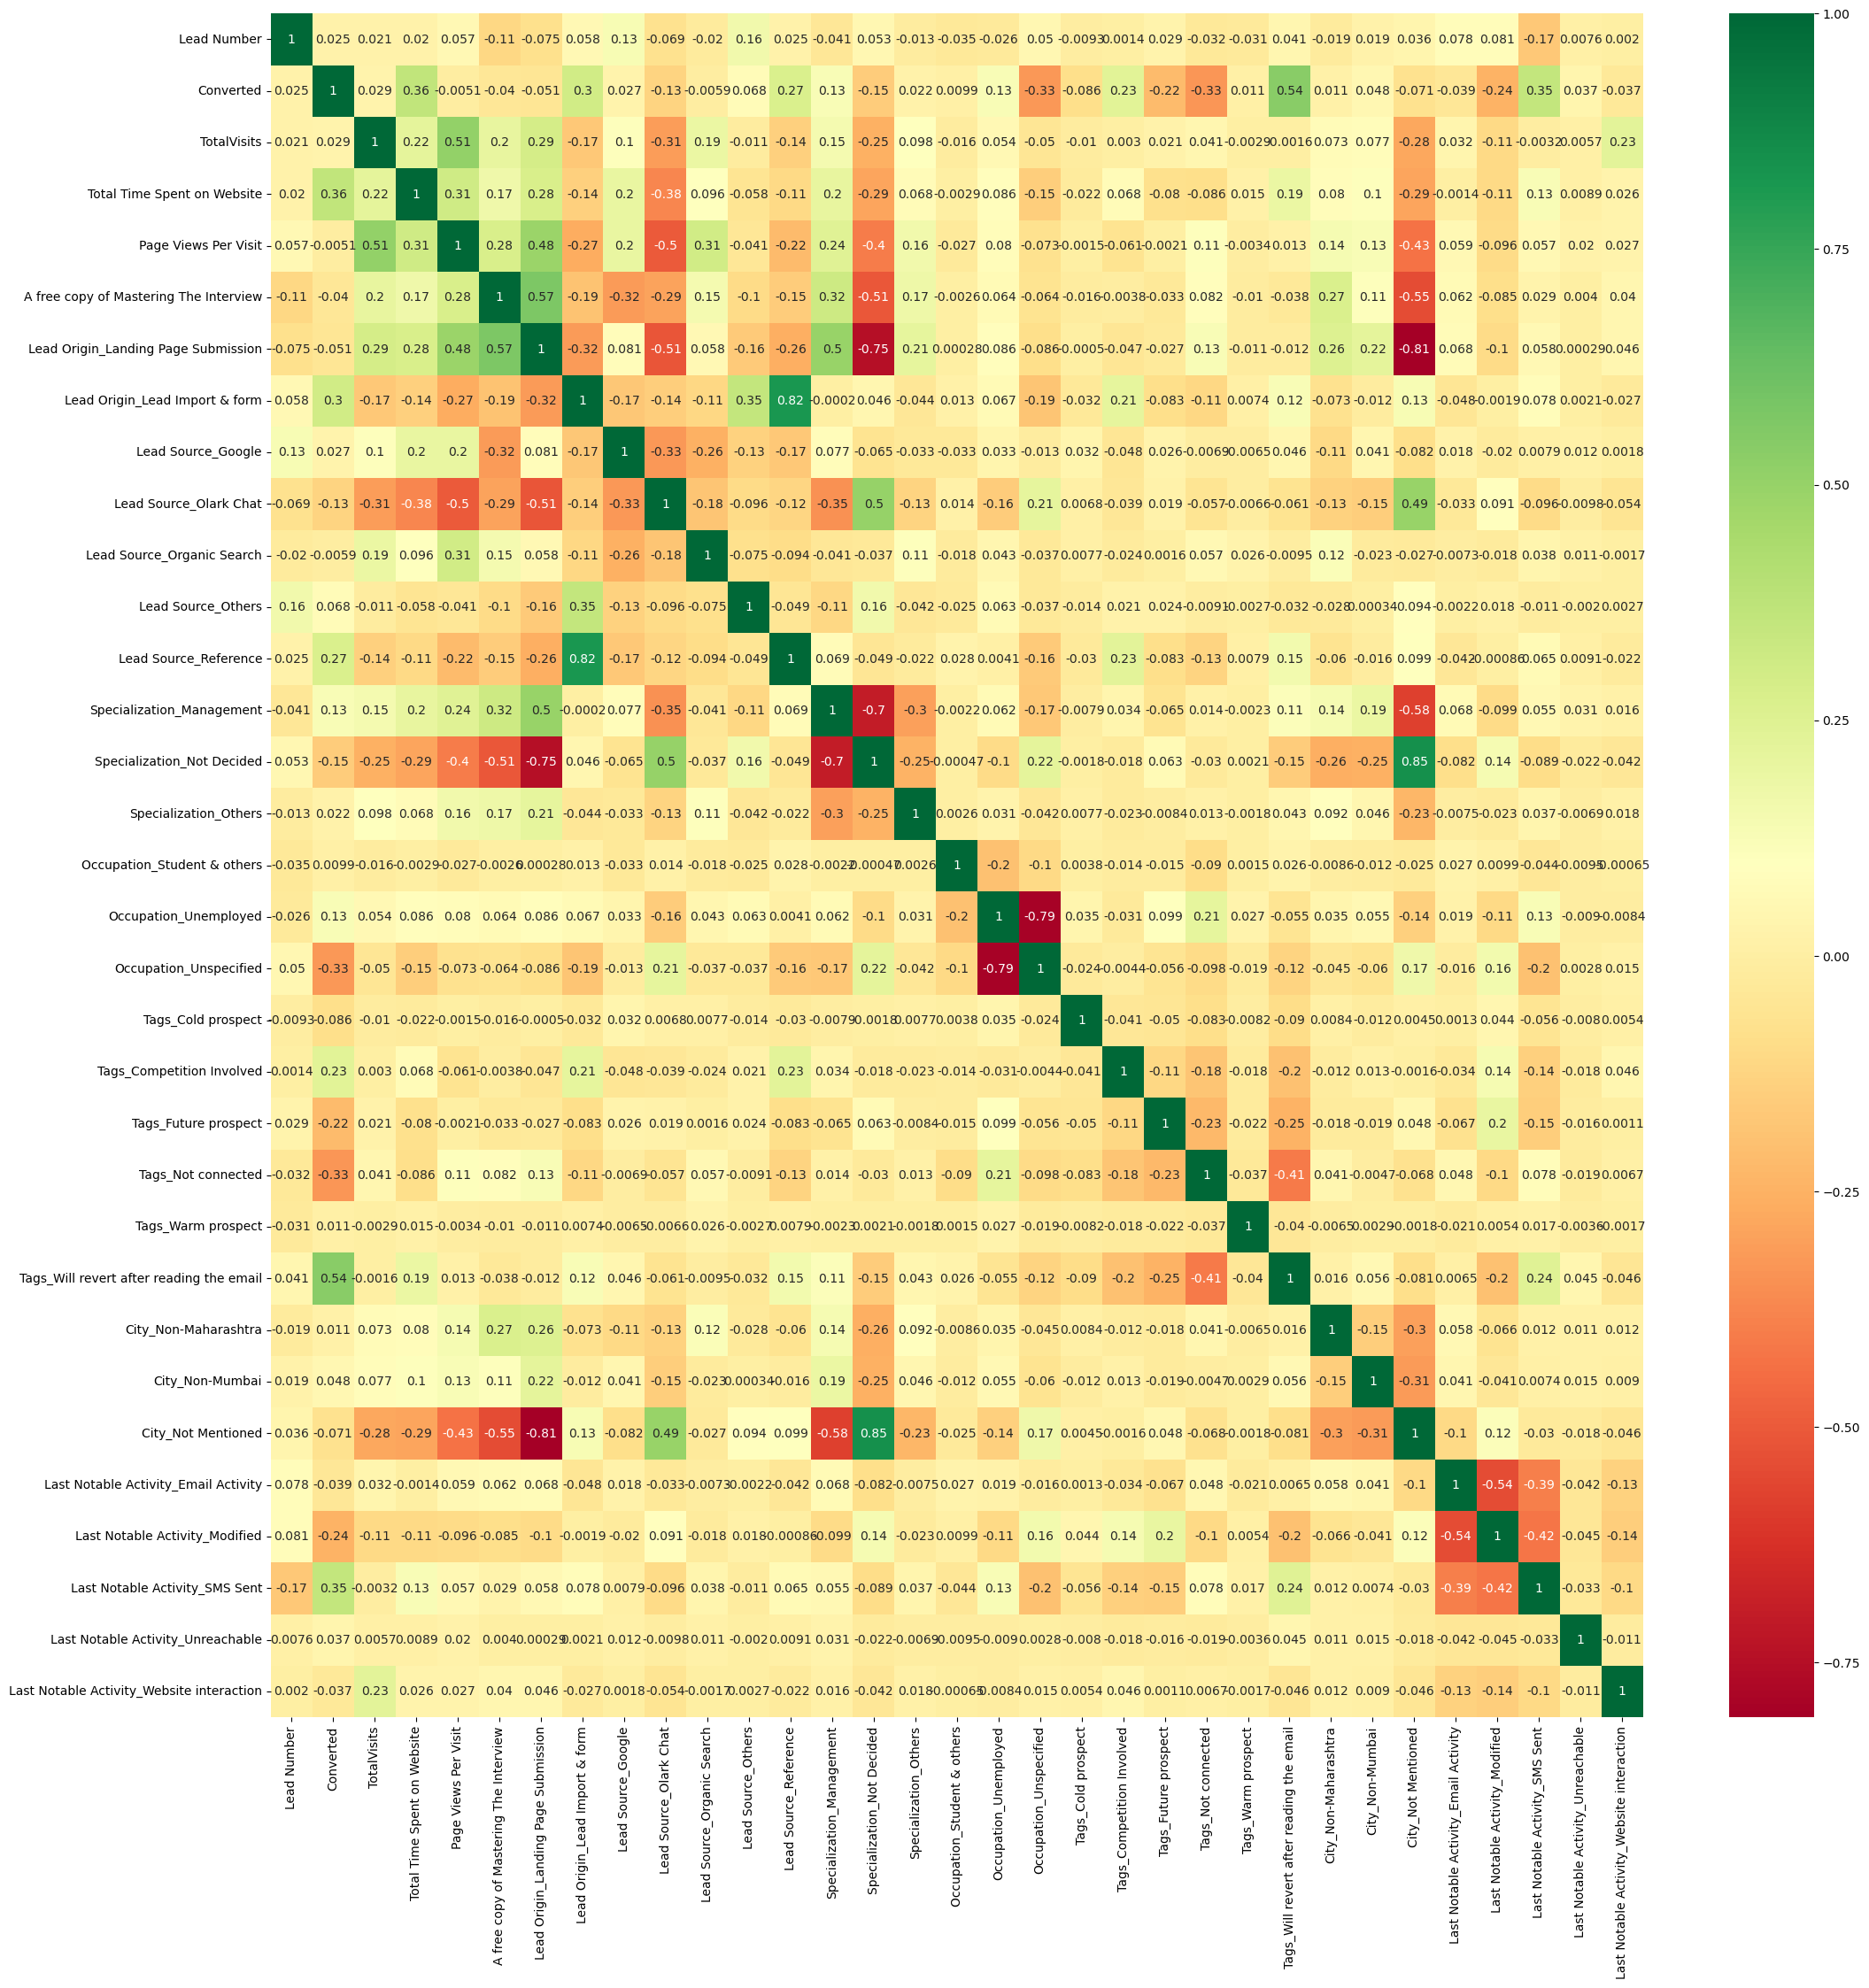

In [82]:
plt.figure(figsize=(25,25))
sns.heatmap(df_dummy.corr(),cmap="RdYlGn",annot=True)
plt.show()

Note: 
- highly correlated variables are with 0.7 and above correlation factor
- let's drop them

In [84]:
df_dummy.drop(["Lead Origin_Landing Page Submission","Occupation_Unspecified","Lead Origin_Lead Import & form",
               "Specialization_Not Decided"],
              axis=1,inplace=True)

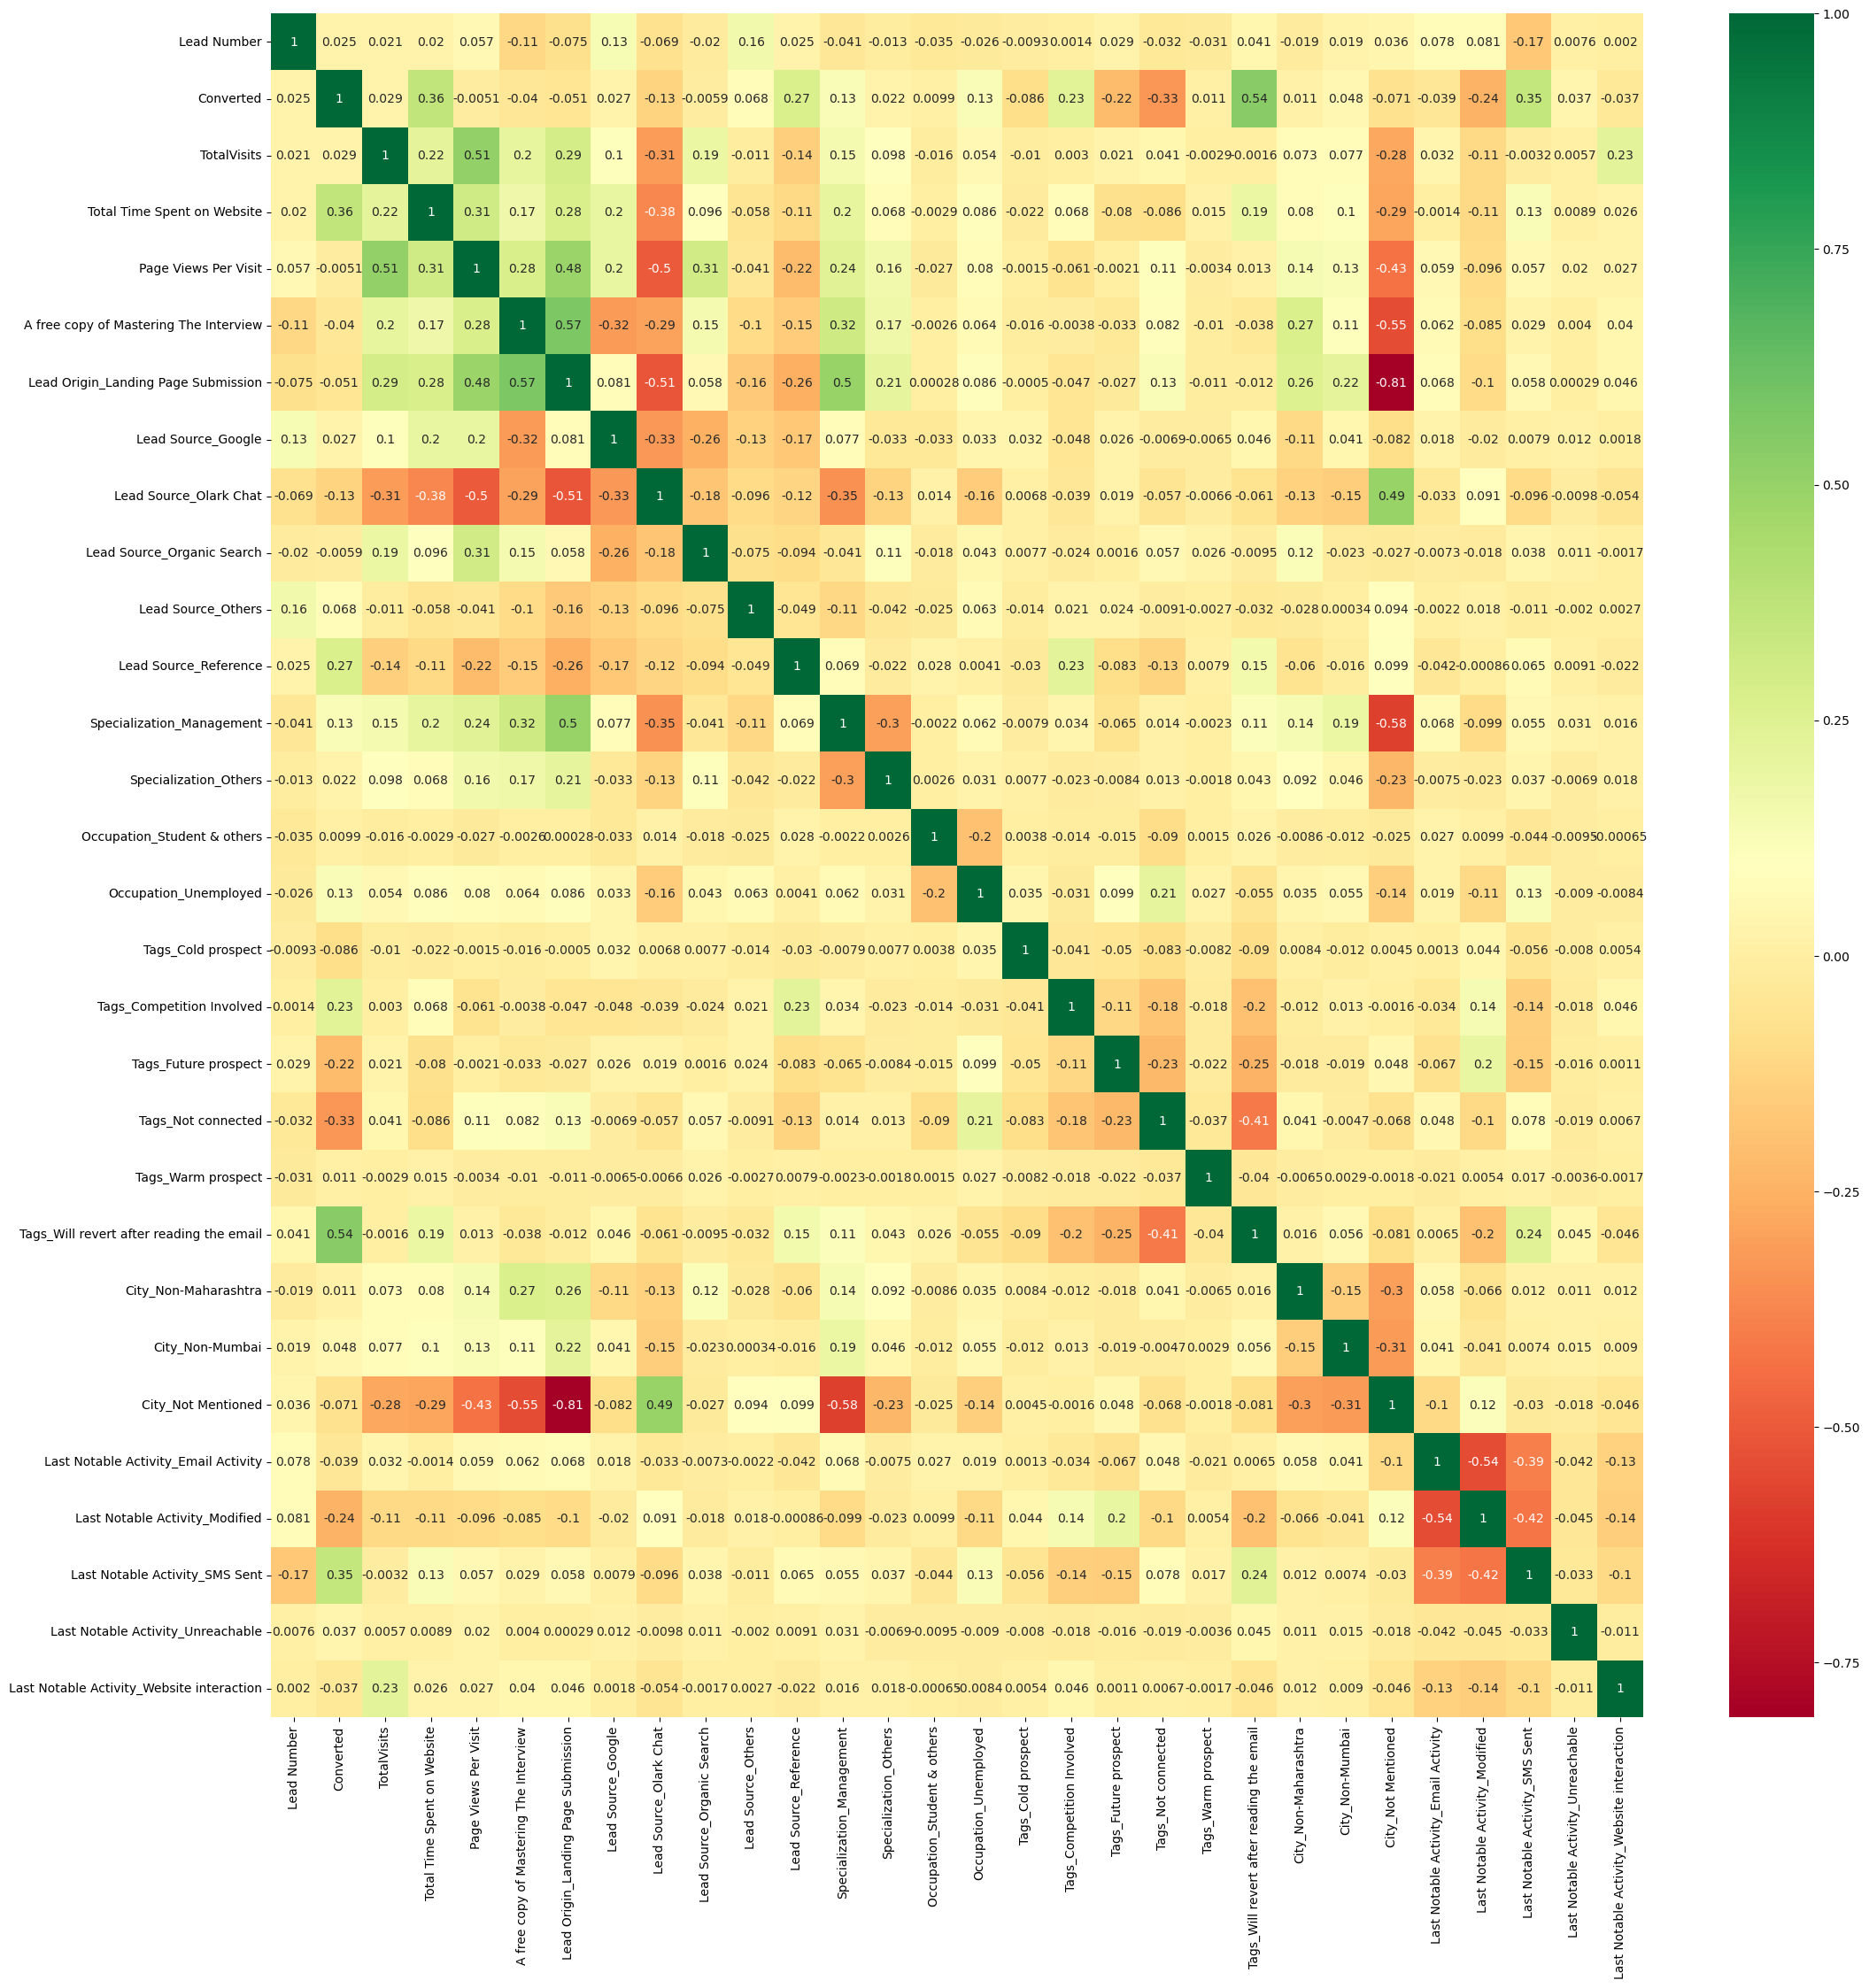

In [85]:
# let's check for correlation after dropping highly correlated variables
plt.figure(figsize=(25,25))
sns.heatmap(df_dummy.corr(),cmap="RdYlGn",annot=True)
plt.show()

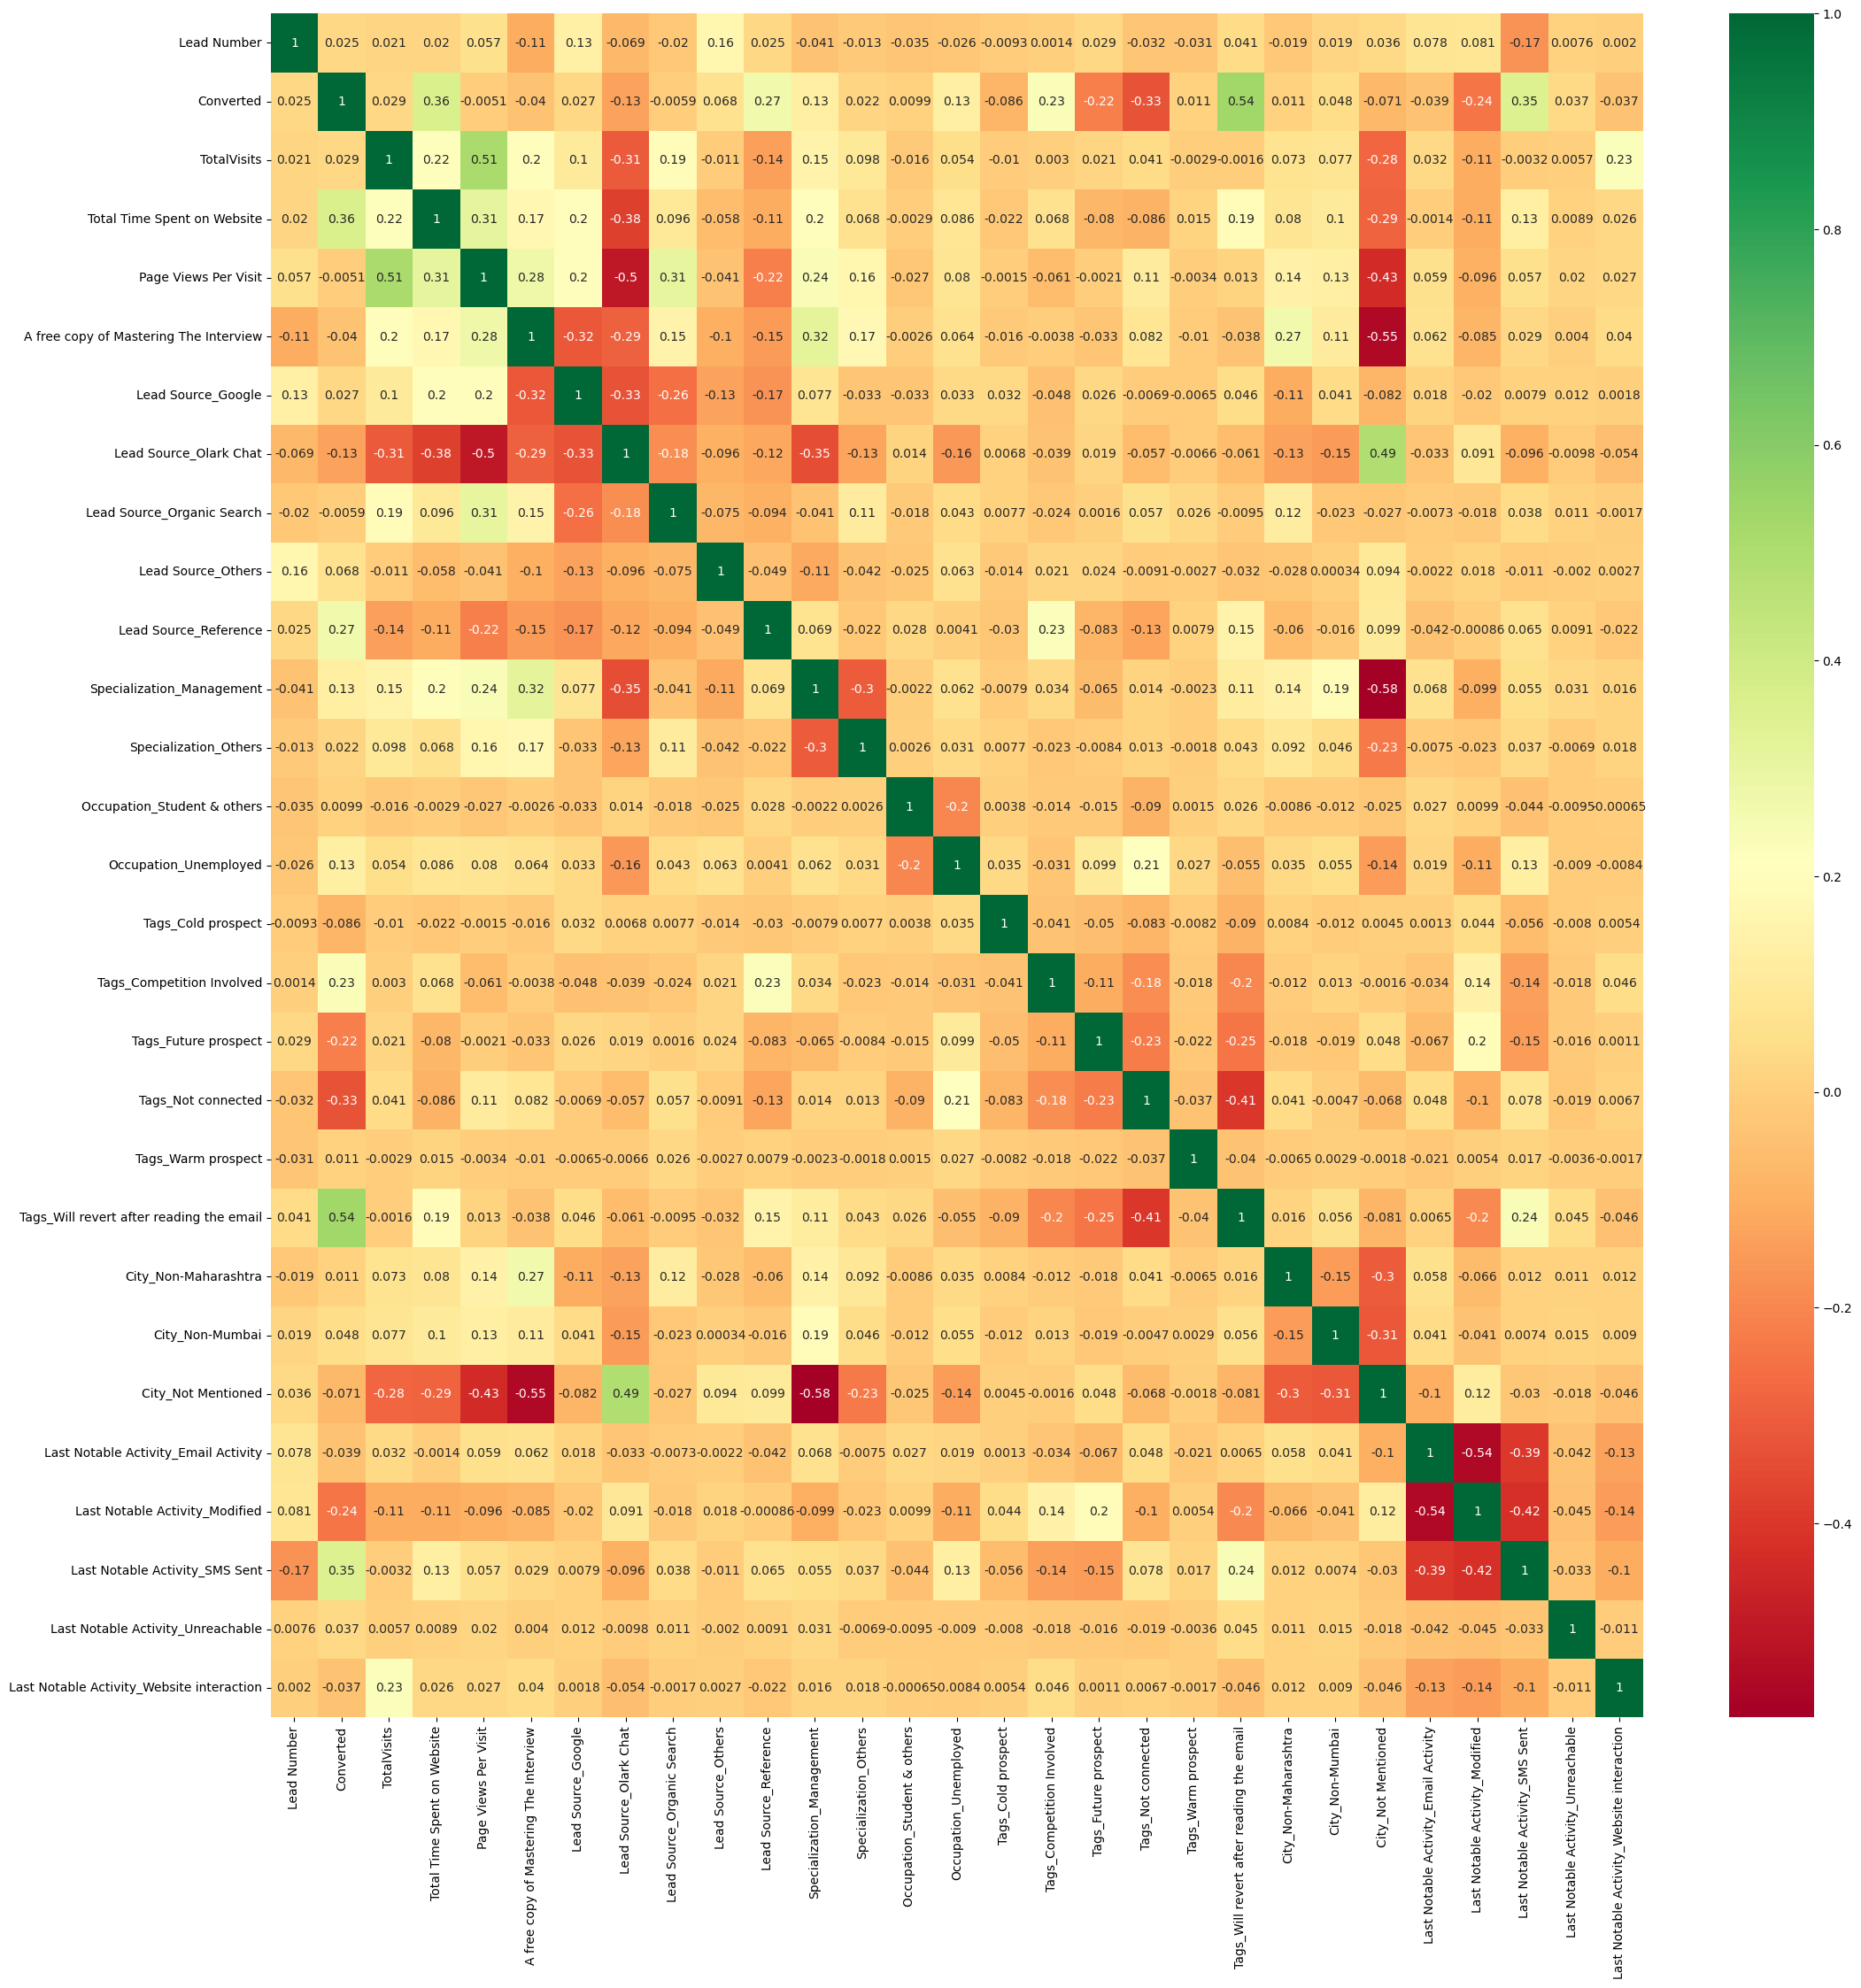

In [87]:
plt.figure(figsize=(25,25))
sns.heatmap(df_dummy.corr(),cmap="RdYlGn",annot=True)
plt.show()

Note: Now, no variables have strong correlation

### Handling Outliers

In [88]:
df_dummy[numerical_cols].describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.438636                   487.698268              2.357440
std       4.819024                   548.021466              2.145781
min       0.000000                     0.000000              0.000000
0%        0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

We can cap the "TotalVisits" & "Page Views Per Visit" columns at 99th percentile to get rid of outliers.

In [89]:
df_dummy = df_dummy[df_dummy.TotalVisits <= df_dummy.TotalVisits.quantile(0.99)]
df_dummy = df_dummy[df_dummy["Page Views Per Visit"] <= df_dummy["Page Views Per Visit"].quantile(0.99)]
df_dummy[numerical_cols].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9090.000000                  9090.000000           9090.000000
mean      3.140924                   484.243784              2.262836
std       2.881884                   547.243973              1.881164
min       0.000000                     0.000000              0.000000
25%       1.000000                     9.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       4.000000                   930.000000              3.000000
max      17.000000                  2272.000000              9.000000

In [ ]:
# lets plot the numerical columns to check if the outliers have been dealt correctly

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.boxplot(df_dummy.TotalVisits,orient="h")
plt.title("Total Visits")

plt.subplot(3,1,2)
sns.boxplot(df_dummy["Total Time Spent on Website"],orient="h")
plt.title("Time Spent")

plt.subplot(3,1,3)
sns.boxplot(df_dummy["Page Views Per Visit"],orient="h")
plt.title("Page Views Per Visit")

plt.show()

we have dealt with the outliers

In [ ]:
# let's check the numerical variables wrt target variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_dummy)
plt.show()

- Median is almost same for the both the categories, but we can roughly say that higher the number of total visits higher are the chances of conversion.

In [ ]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_dummy)
plt.show()

- There is significant difference in the median value as well as distribution of converted and not-converted categories wrt total time spent on website.
- It is evident that higher the time spent higher is the chance of conversion.

In [ ]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_dummy)
plt.show()


- Median is almost same for the both the categories wrt page view, we cannot strongly infer anything from it.

In [90]:
# seperating target variable from dataframe
y = df_dummy.pop("Converted")
X = df_dummy

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=50,stratify=y)

In [92]:
X_train.shape

(6363, 28)

In [93]:
X_test.shape

(2727, 28)

In [94]:
# scaling numerical variables
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

In [95]:
# checking if scaling has been performed correctly
X_train.head()

Lead Number  TotalVisits  Total Time Spent on Website  \
5013       611752    -1.089495                    -0.883739   
6327       601368    -1.089495                    -0.883739   
7922       589038    -1.089495                    -0.883739   
8711       583404     0.306981                     1.078594   
1759       642242    -1.089495                    -0.883739   

      Page Views Per Visit  A free copy of Mastering The Interview  \
5013             -1.201984                                       0   
6327             -1.201984                                       0   
7922             -1.201984                                       0   
8711              0.939816                                       1   
1759             -1.201984                                       0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
5013                   0                       1                           0   
6327                   0                       1                           0   
7922                   0                       1                           0   
8711                   0                       0                           0   
1759                   0                       1                           0   

      Lead Source_Others  Lead Source_Reference  Specialization_Management  \
5013                   0                      0                          0   
6327                   0                      0                          0   
7922                   0                      0                          0   
8711                   0                      0                          0   
1759                   0                      0                          0   

      Specialization_Others  Occupation_Student & others  \
5013                      0                            0   
6327                      0                            0   
7922                      0                            0   
8711                      1                            0   
1759                      0                            0   

      Occupation_Unemployed  Tags_Cold prospect  Tags_Competition Involved  \
5013                      0                   0                          0   
6327                      1                   0                          0   
7922                      0                   1                          0   
8711                      1                   0                          0   
1759                      1                   0                          0   

      Tags_Future prospect  Tags_Not connected  Tags_Warm prospect  \
5013                     0                   0                   0   
6327                     0                   0                   0   
7922                     0                   0                   0   
8711                     0                   0                   0   
1759                     0                   0                   0   

      Tags_Will revert after reading the email  City_Non-Maharashtra  \
5013                                         0                     0   
6327                                         0                     0   
7922                                         0                     0   
8711                                         1                     1   
1759                                         0                     0   

      City_Non-Mumbai  City_Not Mentioned  \
5013                0                   1   
6327                0                   1   
7922                0                   1   
8711                0                   0   
1759                0                   1   

      Last Notable Activity_Email Activity  Last Notable Activity_Modified  \
5013                                     0                               1   
6327                                     0                               1   
7922                                     1                         

In [96]:
X_train.pop("Lead Number")

5013    611752
6327    601368
7922    589038
8711    583404
1759    642242
         ...  
7351    593051
2156    639109
3211    629353
3116    629976
3491    626991
Name: Lead Number, Length: 6363, dtype: int32

## Model 1 using all the variables

In [97]:
logreg_model_1 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
logreg_model_1 = logreg_model_1.fit()
logreg_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1852.4
Date:                Mon, 19 Jun 2023   Deviance:                       3704.8
Time:                        11:56:04   Pearson chi2:                 8.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5278
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.4454      0.376    -11.808      0.000      -5.183      -3.708
TotalVisits                                   0.2537      0.064      3.935      0.000       0.127       0.380
Total Time Spent on Website                   1.0425      0.049     21.156      0.000       0.946       1.139
Page Views Per Visit                         -0.2894      0.070     -4.140      0.000      -0.426      -0.152
A free copy of Mastering The Interview       -0.2679      0.136     -1.976      0.048      -0.534      -0.002
Lead Source_Google                            0.4423      0.139      3.179      0.001       0.170       0.715
Lead Source_Olark Chat                        1.1647      0.184      6.328      0.000       0.804       1.525
Lead Source_Organic Search                    0.3997      0.161      2.483      0.013       0.084       0.715
Lead Source_Others                            2.3690      0.244      9.713      0.000       1.891       2.847
Lead Source_Reference                         2.9327      0.274     10.718      0.000       2.396       3.469
Specialization_Management                     0.4792      0.130      3.695      0.000       0.225       0.733
Specialization_Others                         0.4003      0.183      2.185      0.029       0.041       0.759
Occupation_Student & others                   0.7712      0.277      2.789      0.005       0.229       1.313
Occupation_Unemployed                         1.4687      0.100     14.636      0.000       1.272       1.665
Tags_Cold prospect                           -1.6757      0.484     -3.459      0.001      -2.625      -0.726
Tags_Competition Involved                     3.2093      0.170     18.864      0.000       2.876       3.543
Tags_Future prospect                         -0.9805      0.177     -5.549      0.000      -1.327      -0.634
Tags_Not connected                           -1.8158      0.147    -12.372      0.000      -2.103      -1.528
Tags_Warm prospect                            0.4947      0.548      0.903      0.366      -0.579       1.568
Tags_Will revert after reading the email      2.5006      0.124     20.114      0.000       2.257       2.744
City_Non-Maharashtra                         -0.0194      0.144     -0.134      0.893      -0.302       0.263
City_Non-Mumbai                              -0.1937      0.137     -1.411      0.158      -0.463       0.075
City_Not Mentioned                           -0.0150      0.157     -0.096      0.924      -0.323       0.292
Last Notable Activity_Email Activity          1.3282      0.311      4.269      0.000       0.718       1.938
Last Notable Activity_Modified                0.4256      0.312      1.366      0.172      -0.185       1.036
Las

In [ ]:
# feature selection using rfe

In [98]:
logreg = LogisticRegression()

In [99]:
rfe = RFE(logreg,n_features_to_select=20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train,y_train)

In [100]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Management', True, 1),
 ('Specialization_Others', True, 1),
 ('Occupation_Student & others', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Tags_Cold prospect', True, 1),
 ('Tags_Competition Involved', True, 1),
 ('Tags_Future prospect', True, 1),
 ('Tags_Not connected', True, 1),
 ('Tags_Warm prospect', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('City_Non-Maharashtra', False, 7),
 ('City_Non-Mumbai', False, 5),
 ('City_Not Mentioned', False, 8),
 ('Last Notable Activity_Email Activity', True, 1),
 ('Last Notable Activity_Modified', False, 6),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Last No

In [102]:
col = X_train.columns[rfe.support_]

In [103]:
# eliminated variables
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'City_Non-Maharashtra',
       'City_Non-Mumbai', 'City_Not Mentioned',
       'Last Notable Activity_Modified'],
      dtype='object')

In [104]:
# retained variables
col

Index(['Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Management', 'Specialization_Others',
       'Occupation_Student & others', 'Occupation_Unemployed',
       'Tags_Cold prospect', 'Tags_Competition Involved',
       'Tags_Future prospect', 'Tags_Not connected', 'Tags_Warm prospect',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Activity',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Website interaction'],
      dtype='object')

##### Assessing the model with StatsModels

In [105]:
logreg_model_2 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
logreg_model_2 = logreg_model_2.fit()
logreg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1867.1
Date:                Mon, 19 Jun 2023   Deviance:                       3734.1
Time:                        11:56:29   Pearson chi2:                 8.65e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5256
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.2258      0.174    -24.263      0.000      -4.567      -3.884
Total Time Spent on Website                   1.0373      0.049     21.256      0.000       0.942       1.133
Lead Source_Google                            0.6003      0.112      5.343      0.000       0.380       0.821
Lead Source_Olark Chat                        1.3993      0.155      9.048      0.000       1.096       1.702
Lead Source_Organic Search                    0.4409      0.148      2.974      0.003       0.150       0.731
Lead Source_Others                            2.5697      0.231     11.117      0.000       2.117       3.023
Lead Source_Reference                         3.2228      0.247     13.042      0.000       2.738       3.707
Specialization_Management                     0.3865      0.102      3.778      0.000       0.186       0.587
Specialization_Others                         0.2903      0.161      1.798      0.072      -0.026       0.607
Occupation_Student & others                   0.7959      0.276      2.886      0.004       0.255       1.336
Occupation_Unemployed                         1.4727      0.099     14.807      0.000       1.278       1.668
Tags_Cold prospect                           -1.6917      0.485     -3.486      0.000      -2.643      -0.740
Tags_Competition Involved                     3.2268      0.168     19.160      0.000       2.897       3.557
Tags_Future prospect                         -0.9914      0.175     -5.649      0.000      -1.335      -0.647
Tags_Not connected                           -1.8225      0.146    -12.518      0.000      -2.108      -1.537
Tags_Warm prospect                            0.5174      0.540      0.959      0.338      -0.541       1.575
Tags_Will revert after reading the email      2.4831      0.123     20.201      0.000       2.242       2.724
Last Notable Activity_Email Activity          0.9263      0.104      8.878      0.000       0.722       1.131
Last Notable Activity_SMS Sent                3.0618      0.130     23.580      0.000       2.807       3.316
Last Notable Activity_Unreachable             2.1226      0.720      2.949      0.003       0.712       3.533
Last Notable Activity_Website interaction     0.7251      0.247      2.938      0.003       0.241       1.209
=============================================================================================================
"""

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                       Occupation_Unemployed  2.91
15   Tags_Will revert after reading the email  2.62
13                         Tags_Not connected  2.32
6                   Specialization_Management  2.21
17             Last Notable Activity_SMS Sent  1.85
16       Last Notable Activity_Email Activity  1.82
1                          Lead Source_Google  1.77
2                      Lead Source_Olark Chat  1.62
12                       Tags_Future prospect  1.51
11                  Tags_Competition Involved  1.43
5                       Lead Source_Reference  1.37
0                 Total Time Spent on Website  1.33
3                  Lead Source_Organic Search  1.32
7                       Specialization_Others  1.25
4                          Lead Source_Others  1.12
10                         Tags_Cold prospect  1.09
19  Last Notable Activity_Website interaction  1.07
8                 Occupation_Student & others  1.05
14                         Tags_Warm prospect  1.02
18          Last Notable Activity_Unreachable  1.02

"Tags_Warm prospect has p value greater than 0.05 and is highest among all other variables, so lets drop the variable and rebuild model.

In [107]:
col = col.drop("Tags_Warm prospect")

In [108]:
logreg_model_3 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
logreg_model_3 = logreg_model_3.fit()
logreg_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1867.5
Date:                Mon, 19 Jun 2023   Deviance:                       3735.0
Time:                        11:57:32   Pearson chi2:                 8.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5255
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.2130      0.173    -24.291      0.000      -4.553      -3.873
Total Time Spent on Website                   1.0379      0.049     21.271      0.000       0.942       1.133
Lead Source_Google                            0.6009      0.112      5.349      0.000       0.381       0.821
Lead Source_Olark Chat                        1.3993      0.155      9.048      0.000       1.096       1.702
Lead Source_Organic Search                    0.4482      0.148      3.028      0.002       0.158       0.738
Lead Source_Others                            2.5656      0.231     11.099      0.000       2.113       3.019
Lead Source_Reference                         3.2315      0.247     13.084      0.000       2.747       3.716
Specialization_Management                     0.3874      0.102      3.787      0.000       0.187       0.588
Specialization_Others                         0.2937      0.161      1.819      0.069      -0.023       0.610
Occupation_Student & others                   0.7986      0.275      2.905      0.004       0.260       1.337
Occupation_Unemployed                         1.4793      0.099     14.907      0.000       1.285       1.674
Tags_Cold prospect                           -1.7117      0.485     -3.529      0.000      -2.662      -0.761
Tags_Competition Involved                     3.2101      0.167     19.184      0.000       2.882       3.538
Tags_Future prospect                         -1.0098      0.174     -5.793      0.000      -1.351      -0.668
Tags_Not connected                           -1.8426      0.144    -12.798      0.000      -2.125      -1.560
Tags_Will revert after reading the email      2.4673      0.122     20.291      0.000       2.229       2.706
Last Notable Activity_Email Activity          0.9229      0.104      8.853      0.000       0.719       1.127
Last Notable Activity_SMS Sent                3.0609      0.130     23.588      0.000       2.807       3.315
Last Notable Activity_Unreachable             2.1161      0.719      2.941      0.003       0.706       3.526
Last Notable Activity_Website interaction     0.7207      0.247      2.921      0.003       0.237       1.204
=============================================================================================================
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                       Occupation_Unemployed  2.89
14   Tags_Will revert after reading the email  2.59
13                         Tags_Not connected  2.29
6                   Specialization_Management  2.21
16             Last Notable Activity_SMS Sent  1.85
15       Last Notable Activity_Email Activity  1.82
1                          Lead Source_Google  1.76
2                      Lead Source_Olark Chat  1.61
12                       Tags_Future prospect  1.50
11                  Tags_Competition Involved  1.42
5                       Lead Source_Reference  1.37
0                 Total Time Spent on Website  1.33
3                  Lead Source_Organic Search  1.31
7                       Specialization_Others  1.25
4                          Lead Source_Others  1.12
10                         Tags_Cold prospect  1.09
18  Last Notable Activity_Website interaction  1.07
8                 Occupation_Student & others  1.05
17          Last Notable Activity_Unreachable  1.02

Note: "Specialization_Others" has highest p value greater than 0.05 among all other variables, let's drop it and rebuild model

In [110]:
col = col.drop("Specialization_Others")

In [111]:
logreg_model_4 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
logreg_model_4 = logreg_model_4.fit()
logreg_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1869.2
Date:                Mon, 19 Jun 2023   Deviance:                       3738.3
Time:                        11:58:31   Pearson chi2:                 8.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5253
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.1369      0.168    -24.654      0.000      -4.466      -3.808
Total Time Spent on Website                   1.0385      0.049     21.289      0.000       0.943       1.134
Lead Source_Google                            0.5722      0.111      5.145      0.000       0.354       0.790
Lead Source_Olark Chat                        1.3270      0.149      8.907      0.000       1.035       1.619
Lead Source_Organic Search                    0.4386      0.148      2.964      0.003       0.149       0.729
Lead Source_Others                            2.4986      0.228     10.948      0.000       2.051       2.946
Lead Source_Reference                         3.2118      0.246     13.030      0.000       2.729       3.695
Specialization_Management                     0.3147      0.094      3.348      0.001       0.131       0.499
Occupation_Student & others                   0.7955      0.274      2.908      0.004       0.259       1.332
Occupation_Unemployed                         1.4785      0.099     14.909      0.000       1.284       1.673
Tags_Cold prospect                           -1.6971      0.487     -3.487      0.000      -2.651      -0.743
Tags_Competition Involved                     3.2222      0.167     19.275      0.000       2.895       3.550
Tags_Future prospect                         -1.0037      0.174     -5.754      0.000      -1.346      -0.662
Tags_Not connected                           -1.8259      0.144    -12.715      0.000      -2.107      -1.544
Tags_Will revert after reading the email      2.4831      0.121     20.464      0.000       2.245       2.721
Last Notable Activity_Email Activity          0.9276      0.104      8.906      0.000       0.723       1.132
Last Notable Activity_SMS Sent                3.0620      0.130     23.602      0.000       2.808       3.316
Last Notable Activity_Unreachable             2.1164      0.722      2.931      0.003       0.701       3.531
Last Notable Activity_Website interaction     0.7125      0.246      2.891      0.004       0.229       1.195
=============================================================================================================
"""

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                       Occupation_Unemployed  2.87
13   Tags_Will revert after reading the email  2.50
12                         Tags_Not connected  2.23
6                   Specialization_Management  1.98
15             Last Notable Activity_SMS Sent  1.83
14       Last Notable Activity_Email Activity  1.80
1                          Lead Source_Google  1.76
2                      Lead Source_Olark Chat  1.59
11                       Tags_Future prospect  1.48
10                  Tags_Competition Involved  1.40
5                       Lead Source_Reference  1.37
0                 Total Time Spent on Website  1.33
3                  Lead Source_Organic Search  1.30
4                          Lead Source_Others  1.11
9                          Tags_Cold prospect  1.08
17  Last Notable Activity_Website interaction  1.07
7                 Occupation_Student & others  1.05
16          Last Notable Activity_Unreachable  1.02

- As all p values are within 0.05, it means all the variables are relevant, and all vif's are within 5 which means there no multicollinearity present. 
- let's predict the target variable and then assess the model

In [173]:
# Predicting target variable

In [113]:
X_train_sm = sm.add_constant(X_train[col])
y_train_pred = logreg_model_4.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.02348516, 0.09542148, 0.01101854, ..., 0.03874928, 0.00385869,
       0.03527711])

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob    ID
0          0        0.023485  5013
1          0        0.095421  6327
2          0        0.011019  7922
3          1        0.982133  8711
4          0        0.095421  1759

In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted
0          0        0.023485  5013          0
1          0        0.095421  6327          0
2          0        0.011019  7922          0
3          1        0.982133  8711          1
4          0        0.095421  1759          0

In [116]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3628  288]
 [ 415 2032]]


In [117]:
# Predicted-->    not_converted    converted
# Actual
# not_converted          3773           143
# converted              322           2125

In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100)

88.95175231808895


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8304045770331018

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.9264555669050051

In [122]:
# false postive rate - predicting Converted when prospect has not converted
print(FP/ float(TN+FP))

0.0735444330949949


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.8758620689655172


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8973534504081128


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

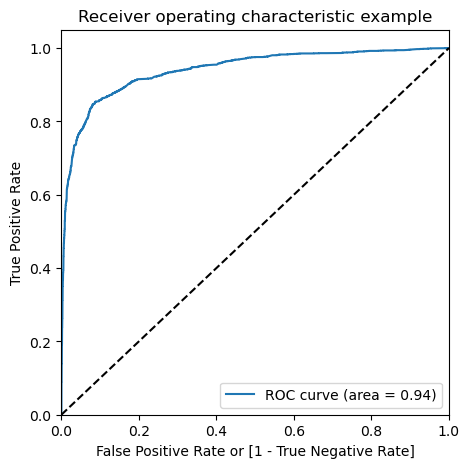

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.023485  5013          0    1    0    0    0    0    0   
1          0        0.095421  6327          0    1    0    0    0    0    0   
2          0        0.011019  7922          0    1    0    0    0    0    0   
3          1        0.982133  8711          1    1    1    1    1    1    1   
4          0        0.095421  1759          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    1    1  
4    0    0    0    0

In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384567  1.000000  0.000000
0.1   0.1  0.753733  0.952595  0.629469
0.2   0.2  0.818325  0.923171  0.752809
0.3   0.3  0.863901  0.884757  0.850868
0.4   0.4  0.882445  0.860237  0.896323
0.5   0.5  0.889518  0.830405  0.926456
0.6   0.6  0.882288  0.784634  0.943309
0.7   0.7  0.876316  0.738455  0.962462
0.8   0.8  0.851642  0.645689  0.980337
0.9   0.9  0.804338  0.504291  0.991828


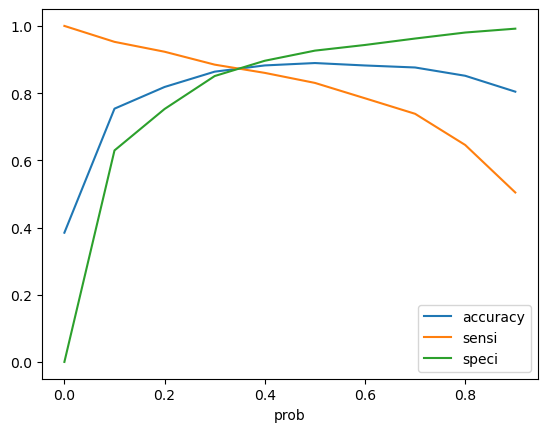

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a intermediate cutoff probability.

In [131]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.023485  5013          0    1    0    0    0    0    0   
1          0        0.095421  6327          0    1    0    0    0    0    0   
2          0        0.011019  7922          0    1    0    0    0    0    0   
3          1        0.982133  8711          1    1    1    1    1    1    1   
4          0        0.095421  1759          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    1    1                1  
4    0    0    0    0                0

In [132]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.873015873015873

In [133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3421,  495],
       [ 313, 2134]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8720882713526767

In [136]:
# Let's calculate specificity
TN / float(TN+FP)

0.8735955056179775

In [137]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12640449438202248


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8117154811715481


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9161756829137654


## Precision and Recall

In [140]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8758620689655172

In [141]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8304045770331018

## F1 Score

In [142]:
f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8525277952590727

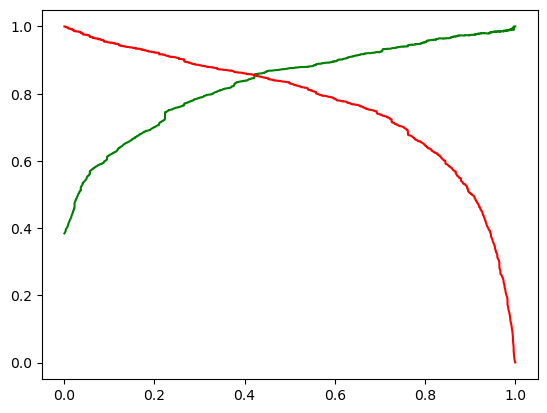

In [143]:
# Precision recall tradeoff

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From precision recall graph, we can take 0.42 as optimal final probability cutoff.

In [144]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.023485  5013          0    1    0    0    0    0    0   
1          0        0.095421  6327          0    1    0    0    0    0    0   
2          0        0.011019  7922          0    1    0    0    0    0    0   
3          1        0.982133  8711          1    1    1    1    1    1    1   
4          0        0.095421  1759          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    1    1                1  
4    0    0    0    0                0

In [145]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.884959924563885

In [146]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8758620689655172

In [147]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8304045770331018

In [148]:
f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8525277952590727

### Making predictions on the test set

In [149]:
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [150]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Source_Google  Lead Source_Olark Chat  \
1904                    -0.790207                   0                       0   
5161                    -0.500442                   0                       0   
1350                     2.213813                   0                       0   
5901                    -0.428917                   0                       0   
3942                     0.462385                   1                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1904                           0                   0                      0   
5161                           0                   0                      0   
1350                           0                   1                      0   
5901                           1                   0                      0   
3942                           0                   0                      0   

      Specialization_Management  Occupation_Student & others  \
1904                          1                            0   
5161                          0                            0   
1350                          1                            0   
5901                          0                            0   
3942                          1                            0   

      Occupation_Unemployed  Tags_Cold prospect  Tags_Competition Involved  \
1904                      1                   0                          0   
5161                      1                   0                          0   
1350                      0                   0                          0   
5901                      1                   1                          0   
3942                      1                   0                          0   

      Tags_Future prospect  Tags_Not connected  \
1904                     0                   1   
5161                     0                   0   
1350                     0                   0   
5901                     0                   0   
3942                     0                   0   

      Tags_Will revert after reading the email  \
1904                                         0   
5161                                         0   
1350                                         1   
5901                                         0   
3942                                         1   

      Last Notable Activity_Email Activity  Last Notable Activity_SMS Sent  \
1904                                     1                               0   
5161                                     0                               0   
1350                                     1                               0   
5901                                     1                               0   
3942                                     0                               1   

      Last Notable Activity_Unreachable  \
1904                                  0   
5161                                  0   
1350                                  0   
5901                                  0   
3942                                  0   

      Last Notable Activity_Website interaction  
1904                                          0  
5161                                          0  
1350                                          0  
5901                                          0  
3942                                          0

In [151]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test dataset using final model number 7

In [153]:
y_test_pred = logreg_model_4.predict(X_test_sm)

In [154]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
1904  0.016912
5161  0.039997
1350  0.987705
5901  0.031228
3942  0.985989

In [155]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [156]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_test_pred
y_test_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [158]:
y_test_pred_final.head()

Converted    ID         0
0          0  1904  0.016912
1          0  5161  0.039997
2          1  1350  0.987705
3          0  5901  0.031228
4          1  3942  0.985989

In [159]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [160]:
y_test_pred_final = y_test_pred_final.reindex(['ID','Converted','Converted_prob'], axis=1)

In [161]:
y_test_pred_final.head()

ID  Converted  Converted_prob
0  1904          0        0.016912
1  5161          0        0.039997
2  1350          1        0.987705
3  5901          0        0.031228
4  3942          1        0.985989

In [162]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [163]:
y_test_pred_final.head()

ID  Converted  Converted_prob  final_predicted
0  1904          0        0.016912                0
1  5161          0        0.039997                0
2  1350          1        0.987705                1
3  5901          0        0.031228                0
4  3942          1        0.985989                1

In [164]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8793546021268793

In [165]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1510,  169],
       [ 160,  888]], dtype=int64)

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8473282442748091

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.8993448481238833

In [169]:
precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8401135288552507

In [170]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8473282442748091

In [171]:
f1_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.843705463182898